In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy
import scipy.stats as stats
import os
import glob
import seaborn as sns
import pingouin as pg
pd.set_option('display.float_format', '{:,.2f}'.format)
from scipy.stats import ttest_rel
from scipy.stats import chi2
from matplotlib.patches import Ellipse
from scipy.stats import norm


In [24]:
e1df = pd.read_csv('e1df.csv') #E1_June12_final_exclDemog.csv 
e2df = pd.read_csv('e2df.csv')

In [25]:
# walking barefoot through the e2 data to see if there was an error # 
#sns.barplot(x = 'targetPresent', y = 'responses', data = e2df[(e2df.taskID == 2) & (e2df.distractorEmotion == "no_face")], alpha = 0.2)
taskID = [2]
expID = 2
tmpdata = e2df.loc[(e2df['taskID'].isin(taskID)),:]
#sns.barplot(x = 'targetPresent', y = 'responses', data = df[(df.taskID == 2) & (df.distractorEmotion == "neutral") & (df.expID == 2)], alpha = 0.2) 

In [26]:
dir_path = "/Users/gorkem.er/Desktop/VisualSearchCartoons"#os.path.join(os.path.dirname(__file__))#os.path.dirname(os.path.realpath(__file__)) #get the full path to the directorrry a python File is contained in
print(dir_path)
os.chdir(dir_path)
#
e1df = pd.read_csv('e1df.csv') #E1_June12_final_exclDemog.csv 
e2df = pd.read_csv('e2df.csv')
# e1
e1df = e1df.rename(columns={'participant_ID': 'subID', 'response': 'responses', 'targetLoc': 'targetThetaList', 'stimArray': 'targetLocList', 'rt': 'responseTime', 'task_ID': 'taskID'})
mask1 = ((e1df.faceTrialID == 'sad_7N')) #sad_7N
mask2 = ((e1df.faceTrialID == 'sad_single'))
mask3 = ((e1df.faceTrialID == 'happy_7N'))
mask4 = ((e1df.faceTrialID == 'happy_single'))
mask5 = ((e1df.faceTrialID == 'neutral_7N')) #neutral_7N
mask6 = ((e1df.faceTrialID == 'neutral_single'))

e1df.loc[mask1, 'targetEmotionList'] = "sad"
e1df.loc[mask2, 'targetEmotionList'] = "sad"
e1df.loc[mask3, 'targetEmotionList'] = "happy"
e1df.loc[mask4, 'targetEmotionList'] = "happy"
e1df.loc[mask5, 'targetEmotionList'] = "neutral"
e1df.loc[mask6, 'targetEmotionList'] = "neutral"

e1df.loc[mask1, 'setSizeList'] = 8
e1df.loc[mask2, 'setSizeList'] = 1
e1df.loc[mask3, 'setSizeList'] = 8
e1df.loc[mask4, 'setSizeList'] = 1
e1df.loc[mask5, 'setSizeList'] = 8
e1df.loc[mask6, 'setSizeList'] = 1

e1df.loc[mask1, 'distractorEmotion'] = "neutral"
e1df.loc[mask2, 'distractorEmotion'] = "no_face"
e1df.loc[mask3, 'distractorEmotion'] = "neutral"
e1df.loc[mask4, 'distractorEmotion'] = "no_face"
e1df.loc[mask5, 'distractorEmotion'] = "neutral"
e1df.loc[mask6, 'distractorEmotion'] = "no_face"

e1df.loc[mask1, 'targetPresent'] = "sad"
e1df.loc[mask2, 'targetPresent'] = "sad"
e1df.loc[mask3, 'targetPresent'] = "happy"
e1df.loc[mask4, 'targetPresent'] = "happy"
e1df.loc[mask5, 'targetPresent'] = 0
e1df.loc[mask6, 'targetPresent'] = 0

facesToKeep = ["sad", "happy"]
mask_1 = ((e1df.targetPresent.isin(facesToKeep)) & (e1df.responses == 3) & (e1df['taskID'] != 2)) | ((e1df.targetPresent == 0) & (e1df.responses == 4) & (e1df['taskID'] != 2))
mask_2 = ((e1df.targetPresent == 0) & (e1df.responses == 3) & (e1df['taskID'] != 2)) | ((e1df.targetPresent.isin(facesToKeep)) & (e1df.responses == 4) & (e1df['taskID'] != 2))
e1df.loc[mask_1, 'ACC'] = 1
e1df.loc[mask_2, 'ACC'] = 0

# For taskID == 2
sad_list = ['sad_7N', 'sad_single']
happy_list = ['happy_7N', 'happy_single']

# For e1df
mask_accurate_e1 = ((e1df.faceTrialID.isin(sad_list)) & (e1df.responses <= 4) & (e1df['taskID'] == 2)) | ((e1df.faceTrialID.isin(happy_list)) & (e1df.responses >= 5) & (e1df['taskID'] == 2))
mask_inaccurate_e1 = ((e1df.faceTrialID.isin(sad_list)) & (e1df.responses > 4) & (e1df['taskID'] == 2)) | ((e1df.faceTrialID.isin(happy_list)) & (e1df.responses < 5) & (e1df['taskID'] == 2))
e1df.loc[mask_accurate_e1, 'ACC'] = 1
e1df.loc[mask_inaccurate_e1, 'ACC'] = 0


#

/Users/gorkem.er/Desktop/VisualSearchCartoons


In [27]:

# adding setSizeList and targetEmotionList for task ID 3
e2df['setSizeList'] = e2df.apply(lambda row: 8 if row['taskID'] in [3, 4] else row['setSizeList'], axis=1)
e2df['targetPresent'] = e2df.apply(lambda row: 0 if row['taskID'] in [3, 4] and row['targetEmotionList'] in ['happy', 'sad'] else row['targetPresent'], axis=1)

# e2 faceTrialID creation #
mask1 = ((e2df.targetEmotionList == 'sad') & (e2df.setSizeList == 8)) #sad_7N
mask2 = ((e2df.targetEmotionList == 'sad') & (e2df.setSizeList == 1)) #sad_single
mask3 = ((e2df.targetEmotionList == 'happy') & (e2df.setSizeList == 8)) #happy_7N
mask4 = ((e2df.targetEmotionList == 'happy') & (e2df.setSizeList == 1)) #happy_single
mask5 = ((e2df.targetEmotionList == 'neutral') & (e2df.setSizeList == 8)) #neutral_7N
mask6 = ((e2df.targetEmotionList == 'neutral') & (e2df.setSizeList == 1)) #neutral_single

e2df.loc[mask1, 'faceTrialID'] = "sad_7N"
e2df.loc[mask2, 'faceTrialID'] = "sad_single"
e2df.loc[mask3, 'faceTrialID'] = "happy_7N"
e2df.loc[mask4, 'faceTrialID'] = "happy_single"
e2df.loc[mask5, 'faceTrialID'] = "neutral_7N"
e2df.loc[mask6, 'faceTrialID'] = "neutral_single"

# For e2df task 2
mask_accurate_e2 = ((e2df.faceTrialID.isin(sad_list)) & (e2df.responses <= 4) & (e2df['taskID'] == 2)) | ((e2df.faceTrialID.isin(happy_list)) & (e2df.responses >= 5) & (e2df['taskID'] == 2))
mask_inaccurate_e2 = ((e2df.faceTrialID.isin(sad_list)) & (e2df.responses > 4) & (e2df['taskID'] == 2)) | ((e2df.faceTrialID.isin(happy_list)) & (e2df.responses < 5) & (e2df['taskID'] == 2))
e2df.loc[mask_accurate_e2, 'ACC'] = 1
e2df.loc[mask_inaccurate_e2, 'ACC'] = 0

In [28]:

cols_to_keep = ['subID', 'targetEmotionList', 'targetThetaList', 'responses', 'responseTime', 'targetPresent', 'distractorEmotion', 'targetLocList', 'ACC', 'taskID', 'setSizeList', 'faceTrialID', 'trial_type']
e1df = e1df.loc[:, cols_to_keep]

cols_to_keep = ['sub', 'targetEmotionList', 'targetThetaList', 'responses', 'responseTime', 'targetPresent', 'distractorEmotion', 'targetLocList', 'ACC', 'taskID', 'setSizeList', 'faceTrialID']
e2df = e2df.loc[:, cols_to_keep]
e2df = e2df.rename(columns={'sub': 'subID', 'response': 'responses', 'targetLoc': 'targetThetaList', 'stimArray': 'targetLocList', 'rt': 'responseTime', 'task_ID': 'taskID'})

print(e1df.columns)
print(e2df.columns)
e1df["expID"] = 1
e2df["expID"] = 2
e2df["trial_type"] = "e2"
searchdf = pd.concat([e1df, e2df], ignore_index=True)
searchdf.to_csv("searchdf.csv")

Index(['subID', 'targetEmotionList', 'targetThetaList', 'responses',
       'responseTime', 'targetPresent', 'distractorEmotion', 'targetLocList',
       'ACC', 'taskID', 'setSizeList', 'faceTrialID', 'trial_type'],
      dtype='object')
Index(['subID', 'targetEmotionList', 'targetThetaList', 'responses',
       'responseTime', 'targetPresent', 'distractorEmotion', 'targetLocList',
       'ACC', 'taskID', 'setSizeList', 'faceTrialID'],
      dtype='object')


In [29]:
df = pd.read_csv('searchdf.csv')
#df['responses'] = df['responses'].replace(0, 10)
# REPLACING 0 with 10 for taskID 2 #
df.loc[(df['expID'] == 2) & (df['taskID'] == 2), 'responses'] = df['responses'].replace(0, 10) # 0 should 10, found out about this after barefooting
df.loc[(df['expID'] == 1) & (df['taskID'] == 2), 'responses'] = df['responses'].replace(0, 10) # 0 should 10, found out about this after barefooting

df.loc[(df['expID'] == 2) & (df['taskID'] == 1), 'responseTime'] *= 1000
df.loc[(df['expID'] == 2) & (df['taskID'] == 3), 'responseTime'] *= 1000
df.loc[(df['expID'] == 2) & (df['taskID'] == 4), 'responseTime'] *= 1000
#
"""submeans = df.groupby(['subID', 'taskID', 'expID'], as_index=False)['ACC'].mean()
 # anyone lower than .80?
lowerPeople = submeans.loc[(submeans['ACC'] < 0.70),:]
lower70People = lowerPeople.subID.tolist()
#df = df[~df['subID'].isin(lower70People)] # removed bad people: ['29715', 'sub1', 'sub12', 'sub16', 'sub36', 'sub43', 'sub9']
#
e1_subs = df.loc[(df['expID'] == 1),:].subID.unique().tolist()
e2_subs = df.loc[(df['expID'] == 2),:].subID.unique().tolist()
 """
#

"submeans = df.groupby(['subID', 'taskID', 'expID'], as_index=False)['ACC'].mean()\n # anyone lower than .80?\nlowerPeople = submeans.loc[(submeans['ACC'] < 0.70),:]\nlower70People = lowerPeople.subID.tolist()\n#df = df[~df['subID'].isin(lower70People)] # removed bad people: ['29715', 'sub1', 'sub12', 'sub16', 'sub36', 'sub43', 'sub9']\n#\ne1_subs = df.loc[(df['expID'] == 1),:].subID.unique().tolist()\ne2_subs = df.loc[(df['expID'] == 2),:].subID.unique().tolist()\n "

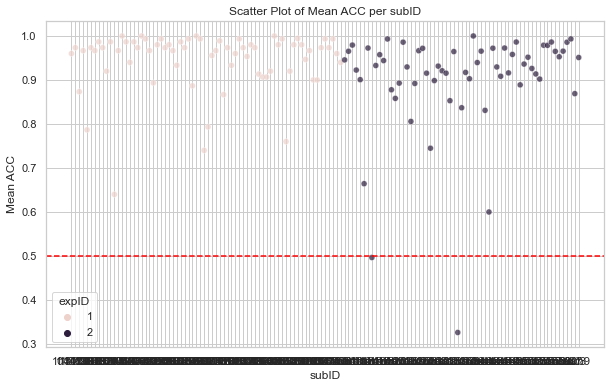

/var/folders/0w/4387q1f935q4_mz0ryr8155c0000gp/T/ipykernel_13570/3523970356.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submeans_exp['mahalanobis'] = submeans_exp.apply(


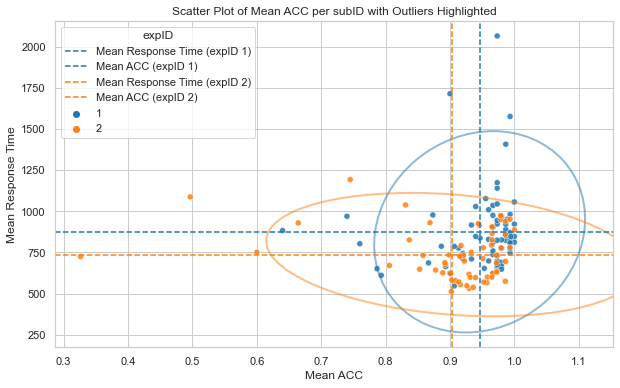

In [30]:
# let's calculate average acc per observer for task 1
# note that # sub 9 pressed wrong button order, can fix it with below, but I'm bypassing 1-ACC
condition = (df['subID'] == 'sub9') & (df['taskID'] == 1)
df.loc[condition, 'ACC'] = df.loc[condition, 'ACC'].replace({0: 1, 1: 0})
#
taskID = 1
if taskID != 2:
    responseVariable = 'responseTime'
else:
    responseVariable = 'responses'
taskdf = df[df.taskID == taskID]

submeans = taskdf.dropna(subset=['ACC']).groupby(['subID', 'expID'], as_index=False).agg({'ACC': 'mean', responseVariable: 'mean'})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='subID', y='ACC', data=submeans, hue = 'expID', color='blue', alpha=0.7)
plt.axhline(y=0.5, color='red', linestyle='--', label='Horizontal Line')
plt.xlabel('subID')
plt.ylabel('Mean ACC')
plt.title('Scatter Plot of Mean ACC per subID')
plt.show()
# let's find out those chance people
submeans.subID[submeans.ACC <0.5]


# Function to calculate Mahalanobis distance | Mahalanobis distance for each point and use it to identify outliers
def mahalanobis_distance(data, mean, cov_inv):
    diff = data - mean
    md = np.sqrt(np.dot(np.dot(diff, cov_inv), diff.T))
    return md

# Scatter plot for both expID 1 and expID 2
plt.figure(figsize=(10, 6))

# Create a color map for expID values
expid_colors = {1: 'tab:blue', 2: 'tab:orange'}
sns.scatterplot(x='ACC', y=responseVariable, data=submeans, hue='expID', palette=expid_colors, alpha=0.85)

# Calculate mean and covariance matrix for both expID 1 and expID 2
for exp_id in submeans['expID'].unique():
    submeans_exp = submeans[submeans['expID'] == exp_id]
    mean_values_exp = submeans_exp[['ACC', responseVariable]].mean().values
    cov_matrix_exp = submeans_exp[['ACC', responseVariable]].cov().values
    cov_inv_exp = np.linalg.inv(cov_matrix_exp)

    # Set the threshold for outlier detection
    threshold_exp = chi2.ppf(0.95, df=2)  # Assuming 2 degrees of freedom for two variables
    submeans_exp['mahalanobis'] = submeans_exp.apply(
        lambda row: mahalanobis_distance(row[['ACC', responseVariable]].values, mean_values_exp, cov_inv_exp), axis=1)
    
    # Filter outliers for the current expID
    outliers_exp = submeans_exp[submeans_exp['mahalanobis'] > threshold_exp]

    # Plot Mahalanobis distance ellipse
    eigenvalues_exp, eigenvectors_exp = np.linalg.eigh(cov_matrix_exp)
    angle_exp = np.degrees(np.arctan2(*eigenvectors_exp[:, 0][::-1]))
    chi2_val_exp = chi2.ppf(0.95, df=2)
    scale_x_exp = np.sqrt(chi2_val_exp * eigenvalues_exp[0])
    scale_y_exp = np.sqrt(chi2_val_exp * eigenvalues_exp[1])
    ellipse_exp = Ellipse(xy=mean_values_exp, width=scale_x_exp * 2, height=scale_y_exp * 2, angle=angle_exp,
                          edgecolor=expid_colors[exp_id], fill=False, linewidth=2, alpha=0.5)
    plt.gca().add_patch(ellipse_exp)

    # Highlight outliers
    sns.scatterplot(x='ACC', y=responseVariable, data=outliers_exp, color='red', marker='x', s=100,
                    label=f'Outliers (expID {exp_id})', edgecolor=expid_colors[exp_id])

    # Plot mean lines
    plt.axhline(y=mean_values_exp[1], linestyle='--', label=f'Mean Response Time (expID {exp_id})', color=expid_colors[exp_id])
    plt.axvline(x=mean_values_exp[0], linestyle='--', label=f'Mean ACC (expID {exp_id})', color=expid_colors[exp_id])

plt.xlabel('Mean ACC')
plt.ylabel('Mean Response Time')
plt.title('Scatter Plot of Mean ACC per subID with Outliers Highlighted')
plt.legend(title='expID')
plt.show()

In [ ]:
# including a 95% confidence ellipse to provide insights into the spread and shape of the data distribution.

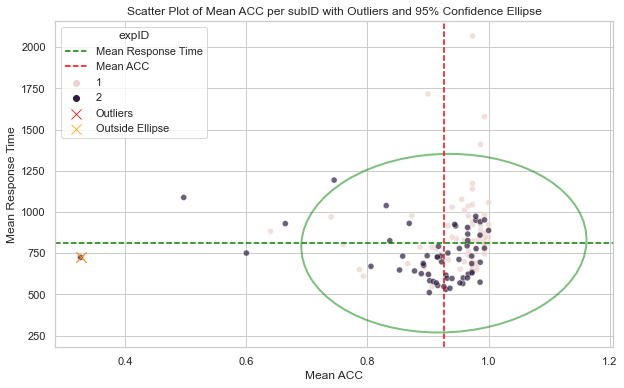

Correlation between ACC and responseTime: 0.03761594504276967


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse
from scipy.stats import chi2
from scipy.spatial.distance import mahalanobis

# Assuming you have the necessary imports and have defined submeans
taskID = 1
expID= 1
# Function to calculate Mahalanobis distance |  Mahalanobis distance for each point and use it to identify outliers
def mahalanobis_distance(data, mean, cov_inv): 
    diff = data - mean
    md = np.sqrt(np.dot(np.dot(diff, cov_inv), diff.T))
    return md

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ACC', y='responseTime', data=submeans, hue='expID', color='blue', alpha=0.7)

# Annotate each point with subID
#for index, row in submeans.iterrows():
#    plt.text(row['ACC'], row['responseTime'], row['subID'], fontsize=8, ha='right', va='bottom')

# Calculate mean and covariance matrix
mean_values = submeans[['ACC', 'responseTime']].mean().values 
cov_matrix = submeans[['ACC', 'responseTime']].cov().values
cov_inv = np.linalg.inv(cov_matrix)

# Set the threshold for outlier detection
threshold = chi2.ppf(0.95, df=2)  # 2 degrees of freedom for two variables

# Identify outliers using Mahalanobis distance
submeans['mahalanobis'] = submeans.apply(lambda row: mahalanobis_distance(row[['ACC', 'responseTime']].values, mean_values, cov_inv), axis=1)
outliers = submeans[submeans['mahalanobis'] > threshold]

# Highlight outliers
sns.scatterplot(x='ACC', y='responseTime', data=outliers, color='red', marker='x', s=100, label='Outliers')

# Plot Mahalanobis distance ellipse
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1])) # second vector for rotation
chi2_val = chi2.ppf(0.95, df=2)
scale_x = np.sqrt(chi2_val * eigenvalues[0])
scale_y = np.sqrt(chi2_val * eigenvalues[1])

# Create ellipse
ellipse = Ellipse(xy=mean_values, width=scale_x * 2, height=scale_y * 2, angle=angle, edgecolor='green', fill=False, linewidth=2, alpha=0.5) #sets the full height of the ellipse.
plt.gca().add_patch(ellipse)

# Identify points outside the ellipse
outside_ellipse = submeans[submeans['mahalanobis'] > threshold]

# Highlight points outside the ellipse
sns.scatterplot(x='ACC', y='responseTime', data=outside_ellipse, color='orange', marker='x', s=100, label='Outside Ellipse')

plt.axhline(y=mean_values[1], color='green', linestyle='--', label='Mean Response Time')
plt.axvline(x=mean_values[0], color='red', linestyle='--', label='Mean ACC')

plt.xlabel('Mean ACC')
plt.ylabel('Mean Response Time')
plt.title('Scatter Plot of Mean ACC per subID with Outliers and 95% Confidence Ellipse')
plt.legend(title='expID')
plt.savefig("cleanProcess/subData"+str(taskID)+"exp_"+str(expID)+".pdf", format='pdf', dpi=600)
plt.show()


correlation = submeans[['ACC', 'responseTime']].corr().iloc[0, 1]
print(f'Correlation between ACC and responseTime: {correlation}')

/var/folders/0w/4387q1f935q4_mz0ryr8155c0000gp/T/ipykernel_13570/3422847114.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submeans_exp1['mahalanobis'] = submeans_exp1.apply(lambda row: mahalanobis_distance(row[['ACC', 'responseTime']].values, mean_values_exp1, cov_inv_exp1), axis=1)


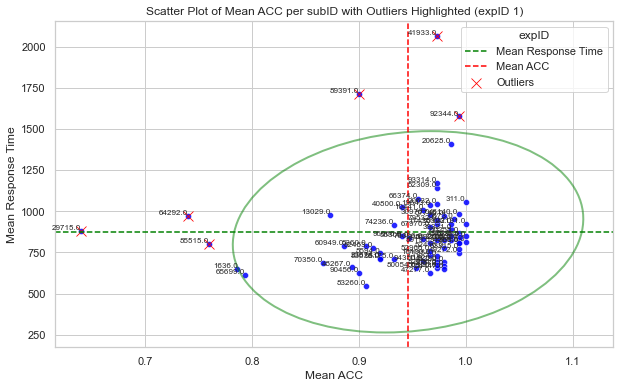

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
from scipy.spatial.distance import mahalanobis
from matplotlib.patches import Ellipse

taskID = 1
expID = 1
# Function to calculate Mahalanobis distance |  Mahalanobis distance for each point and use it to identify outliers
def mahalanobis_distance(data, mean, cov_inv): 
    diff = data - mean
    md = np.sqrt(np.dot(np.dot(diff, cov_inv), diff.T))
    return md

# Scatter plot for expID 1
plt.figure(figsize=(10, 6))
submeans_exp1 = submeans[submeans['expID'] == 1]
sns.scatterplot(x='ACC', y='responseTime', data=submeans_exp1, color='blue', alpha=0.85)

for index, row in submeans_exp1.iterrows():
    plt.text(row['ACC'], row['responseTime'], row['subID'], fontsize=8, ha='right', va='bottom')

# Calculate mean and covariance matrix for expID 1
mean_values_exp1 = submeans_exp1[['ACC', 'responseTime']].mean().values 
cov_matrix_exp1 = submeans_exp1[['ACC', 'responseTime']].cov().values 
cov_inv_exp1 = np.linalg.inv(cov_matrix_exp1) 

# Set the threshold for outlier detection for expID 1
threshold_exp1 = chi2.ppf(0.90, df=1)  
submeans_exp1['mahalanobis'] = submeans_exp1.apply(lambda row: mahalanobis_distance(row[['ACC', 'responseTime']].values, mean_values_exp1, cov_inv_exp1), axis=1)
outliers_exp1 = submeans_exp1[submeans_exp1['mahalanobis'] > threshold_exp1]

# Plot Mahalanobis distance ellipse for expID 1
eigenvalues_exp1, eigenvectors_exp1 = np.linalg.eigh(cov_matrix_exp1)
angle_exp1 = np.degrees(np.arctan2(*eigenvectors_exp1[:, 0][::-1]))
chi2_val_exp1 = chi2.ppf(0.95, df=2)
scale_x_exp1 = np.sqrt(chi2_val_exp1 * eigenvalues_exp1[0])
scale_y_exp1 = np.sqrt(chi2_val_exp1 * eigenvalues_exp1[1])
ellipse_exp1 = Ellipse(xy=mean_values_exp1, width=scale_x_exp1 * 2, height=scale_y_exp1 * 2, angle=angle_exp1, edgecolor='green', fill=False, linewidth=2, alpha=0.5)
plt.gca().add_patch(ellipse_exp1)

# Highlight outliers for expID 1
sns.scatterplot(x='ACC', y='responseTime', data=outliers_exp1, color='red', marker='x', s=100, label='Outliers')

plt.axhline(y=mean_values_exp1[1], color='green', linestyle='--', label='Mean Response Time')
plt.axvline(x=mean_values_exp1[0], color='red', linestyle='--', label='Mean ACC')

plt.xlabel('Mean ACC')
plt.ylabel('Mean Response Time')
plt.title('Scatter Plot of Mean ACC per subID with Outliers Highlighted (expID 1)')
plt.legend(title='expID')
#plt.savefig("cleanProcess/ellipseData"+str(taskID)+"exp_"+str(expID)+".pdf", format='pdf', dpi=600)
plt.show()


/var/folders/0w/4387q1f935q4_mz0ryr8155c0000gp/T/ipykernel_13570/2938322752.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submeans_exp2['mahalanobis'] = submeans_exp2.apply(lambda row: mahalanobis_distance(row[['ACC', 'responseTime']].values, mean_values_exp1, cov_inv_exp1), axis=1)


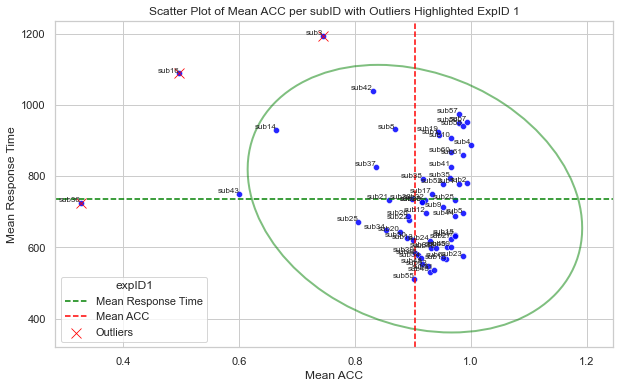

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
from scipy.spatial.distance import mahalanobis
from matplotlib.patches import Ellipse

# Assuming you have the necessary imports and have defined submeans
taskID = 1
expID = 1
# Function to calculate Mahalanobis distance |  Mahalanobis distance for each point and use it to identify outliers
def mahalanobis_distance(data, mean, cov_inv): 
    diff = data - mean
    md = np.sqrt(np.dot(np.dot(diff, cov_inv), diff.T))
    return md

# Scatter plot for expID 2
plt.figure(figsize=(10, 6))
submeans_exp2 = submeans[submeans['expID'] == 2]
sns.scatterplot(x='ACC', y='responseTime', data=submeans_exp2, color='blue', alpha=0.85)

for index, row in submeans_exp2.iterrows():
    plt.text(row['ACC'], row['responseTime'], row['subID'], fontsize=8, ha='right', va='bottom')

# Calculate mean and covariance matrix for expID 2
mean_values_exp1 = submeans_exp2[['ACC', 'responseTime']].mean().values 
cov_matrix_exp1 = submeans_exp2[['ACC', 'responseTime']].cov().values 
cov_inv_exp1 = np.linalg.inv(cov_matrix_exp1) 

# Set the threshold for outlier detection for expID 2
threshold_exp1 = chi2.ppf(0.90, df=1)  
submeans_exp2['mahalanobis'] = submeans_exp2.apply(lambda row: mahalanobis_distance(row[['ACC', 'responseTime']].values, mean_values_exp1, cov_inv_exp1), axis=1)
outliers_exp1 = submeans_exp2[submeans_exp2['mahalanobis'] > threshold_exp1]

# Plot Mahalanobis distance ellipse for expID 2
eigenvalues_exp1, eigenvectors_exp1 = np.linalg.eigh(cov_matrix_exp1)
angle_exp1 = np.degrees(np.arctan2(*eigenvectors_exp1[:, 0][::-1]))
chi2_val_exp1 = chi2.ppf(0.95, df=2)
scale_x_exp1 = np.sqrt(chi2_val_exp1 * eigenvalues_exp1[0])
scale_y_exp1 = np.sqrt(chi2_val_exp1 * eigenvalues_exp1[1])
ellipse_exp1 = Ellipse(xy=mean_values_exp1, width=scale_x_exp1 * 2, height=scale_y_exp1 * 2, angle=angle_exp1, edgecolor='green', fill=False, linewidth=2, alpha=0.5)
plt.gca().add_patch(ellipse_exp1)

# Highlight outliers for expID 2
sns.scatterplot(x='ACC', y='responseTime', data=outliers_exp1, color='red', marker='x', s=100, label='Outliers')

plt.axhline(y=mean_values_exp1[1], color='green', linestyle='--', label='Mean Response Time')
plt.axvline(x=mean_values_exp1[0], color='red', linestyle='--', label='Mean ACC')

plt.xlabel('Mean ACC')
plt.ylabel('Mean Response Time')
plt.title('Scatter Plot of Mean ACC per subID with Outliers Highlighted ExpID '+str(expID))
plt.legend(title='expID'+str(expID))
plt.savefig("cleanProcess/ellipseData"+str(taskID)+"exp_"+str(expID)+".pdf", format='pdf', dpi = 600)
plt.show()

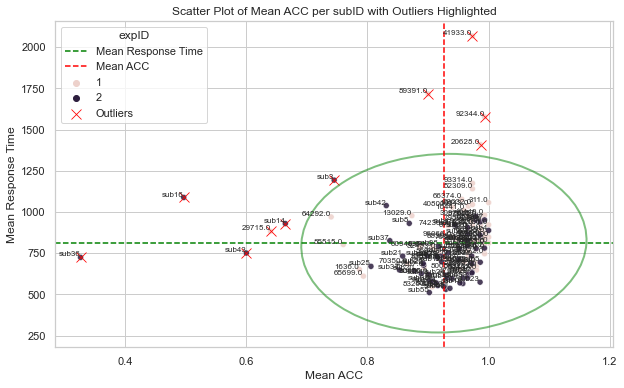

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
from scipy.spatial.distance import mahalanobis

# Assuming you have the necessary imports and have defined submeans

# Function to calculate Mahalanobis distance |  Mahalanobis distance for each point and use it to identify outliers
def mahalanobis_distance(data, mean, cov_inv): 
    diff = data - mean
    md = np.sqrt(np.dot(np.dot(diff, cov_inv), diff.T))
    return md

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ACC', y='responseTime', data=submeans, hue='expID', color='blue', alpha=0.85)

# Annotate each point with subID
for index, row in submeans.iterrows():
    plt.text(row['ACC'], row['responseTime'], row['subID'], fontsize=8, ha='right', va='bottom')

# Calculate mean and covariance matrix
mean_values = submeans[['ACC', 'responseTime']].mean().values 
cov_matrix = submeans[['ACC', 'responseTime']].cov().values #The covariance matrix provides information about how the two variables vary together.  
cov_inv = np.linalg.inv(cov_matrix) #The inverse of the covariance matrix is used in Mahalanobis distance calculations

# Set the threshold for outlier detection
threshold = chi2.ppf(0.88, df=1)  # Assuming 2 degrees of freedom for two variables
# ppf: Percent point function, also known as the inverse cumulative distribution function (CDF). It returns the value at which the given cumulative distribution function (CDF) is equal to the specified probability.

# Identify outliers using Mahalanobis distance
submeans['mahalanobis'] = submeans.apply(lambda row: mahalanobis_distance(row[['ACC', 'responseTime']].values, mean_values, cov_inv), axis=1)
outliers = submeans[submeans['mahalanobis'] > threshold]

# Plot Mahalanobis distance ellipse
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1])) # second vector for rotation
chi2_val = chi2.ppf(0.95, df=2)
scale_x = np.sqrt(chi2_val * eigenvalues[0])
scale_y = np.sqrt(chi2_val * eigenvalues[1])
# Create ellipse
ellipse = Ellipse(xy=mean_values, width=scale_x * 2, height=scale_y * 2, angle=angle, edgecolor='green', fill=False, linewidth=2, alpha=0.5) #sets the full height of the ellipse.
plt.gca().add_patch(ellipse)


# Highlight outliers
sns.scatterplot(x='ACC', y='responseTime', data=outliers, color='red', marker='x', s=100, label='Outliers')

plt.axhline(y=mean_values[1], color='green', linestyle='--', label='Mean Response Time')
plt.axvline(x=mean_values[0], color='red', linestyle='--', label='Mean ACC')

plt.xlabel('Mean ACC')
plt.ylabel('Mean Response Time')
plt.title('Scatter Plot of Mean ACC per subID with Outliers Highlighted')
plt.legend(title='expID')
plt.savefig("cleanProcess/ellipseData_totalExp"+str(taskID)+"exp_"+str(expID)+".pdf", format='pdf', dpi = 600)
plt.show()

#   In the context of detecting outliers using Mahalanobis distance, these calculations are used to capture the statistical relationships between 'ACC' and 'responseTime' and to calculate the Mahalanobis distance for each data point. 
#  It helps in identifying outliers that are unusual not just in terms of individual variables but also in terms of their relationships.

In [35]:
excludedObs = outliers.subID.values
excludedObs

barefootExcludedPeople_e2 = ['sub1', 'sub9', 'sub12', 'sub13', 'sub14', 'sub20', 'sub42', 'sub43', 'sub53', 'sub55', 'sub60'] # for taskID e2. 
barefootExcludedPeople_e1 = ["83835.0", "23674.0"] # for taskID e1

In [36]:
# let's remove those observers
excludedObs = outliers.subID.values
print(excludedObs)
#df = df[~df.subID.isin(excludedObs)]
df = df[~df.subID.isin(barefootExcludedPeople_e2)]


['20628.0' '29715.0' '41933.0' '89391.0' '92344.0' 'sub14' 'sub16' 'sub3'
 'sub36' 'sub43']


In [37]:
df = df[~df.subID.isin(barefootExcludedPeople_e1)]


In [38]:
e1_subs = df.loc[(df['expID'] == 1),:].subID.unique().tolist()
e2_subs = df.loc[(df['expID'] == 2),:].subID.unique().tolist()

In [ ]:
# skip this one go to next block for the main analysis # 

import matplotlib.pyplot as plt
import seaborn as sns

# PLOTTING DISTRIBUTION OF RESPONSES FOR TASK 2 # 
expID = 1  # EXPERIMENT 
taskID = 2  # TASK
accuracy_filter = 0 
custom_palette = {'sad': '#252525', 'happy': '#F8766D', 'neutral': 'gray'} #{0: '#252525', 1: '#F8766D'} {'sad': 'darkblue', 'happy': '#DAA520', 'neutral': 'gray'}

# Check experiment and set subList accordingly
if expID == 1:
    subList = e1_subs
    color_palette = sns.color_palette("tab20b", n_colors=len(e1_subs))
    subject_color_mapping = dict(zip(e1_subs, color_palette))
    all_meansExp1 = pd.DataFrame()
    all_meansExpData = all_meansExp1
elif expID == 2:
    subList = e2_subs
    color_palette = sns.color_palette("tab20b", n_colors=len(e2_subs))
    subject_color_mapping = dict(zip(e2_subs, color_palette))
    all_meansExp2 = pd.DataFrame()
    all_meansExpData = all_meansExp2

# Set seaborn style
sns.set(style="whitegrid")

# Create a FacetGrid with col_wrap parameter
g = sns.FacetGrid(filtered_df[(filtered_df['expID'] == expID) & (filtered_df['taskID'].isin([taskID]))], col="subID", hue="targetEmotionList", margin_titles=True, height=2, col_wrap=7, aspect = 1.5, palette=custom_palette)

# Map a histogram onto the grid
g.map(sns.kdeplot, 'responses', alpha=0.85,  common_norm=True, linewidth=3)#sns.histplot, 'responses', kde=True, alpha=0.7, common_norm=False) #bins=8, #g.map(sns.ecdfplot, 'responses', alpha=0.7) #bins=8,
#g.set(ylim=(0, 1))
# Set plot labels and title
g.set_axis_labels('Responses', 'Density', fontsize=16)
g.set_titles('subID {col_name}', fontsize=16)

# Add legend
#g.add_legend()

# Adjust layout
plt.tight_layout()
# Manually add a legend for the entire plot
plt.legend(title='Target Emotion', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)

# Save the plot to a PDF file
#plt.savefig('distribution_plot_'+str(expID)+'.pdf', format='pdf', bbox_inches='tight', dpi = 600)

# Show the plot
plt.show()


In [ ]:
# same as above #
import matplotlib.pyplot as plt
import seaborn as sns

# PLOTTING DISTRUBTION OF RESPONSES FOR TASK 2 # 
expID = 1  # EXPERIMENT 
taskID = 2  # TASK
accuracy_filter = 0

# Check experiment and set subList accordingly
if expID == 1:
    subList = e1_subs
    color_palette = sns.color_palette("Set2", n_colors=len(e1_subs))
    subject_color_mapping = dict(zip(e1_subs, color_palette))
    all_meansExp1 = pd.DataFrame()
    all_meansExpData = all_meansExp1
elif expID == 2:
    subList = e2_subs
    color_palette = sns.color_palette("Set2", n_colors=len(e2_subs))
    subject_color_mapping = dict(zip(e2_subs, color_palette))
    all_meansExp2 = pd.DataFrame()
    all_meansExpData = all_meansExp2

# Set seaborn style
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(15, 8))

# Loop through each subID and plot the distribution
for sub in subList:
    # Filter data for the current subID
    tmpdata = filtered_df.loc[(filtered_df['expID'] == expID) & (filtered_df['taskID'].isin([taskID])) & (filtered_df['subID'] == sub), :]

    # Plot the distribution using seaborn's histplot
    sns.histplot(tmpdata['responses'], bins=20, kde=True, alpha=0.5, label=f'subID {sub}', color=subject_color_mapping[sub], stat="density", common_norm=False, element="step", fill=False)

# Set plot labels and title
plt.xlabel('Responses')
plt.ylabel('Density')
plt.title('Distribution of Responses for All subIDs (Stacked)')

# Display a legend
#plt.legend()

# Save the plot to a PDF file
#plt.savefig('distribution_plot_stacked.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


taskID is: [1]
length first: 180
length after dropping outlier reaction times: 178
length first: 180
length after dropping outlier reaction times: 178
length first: 180
length after dropping outlier reaction times: 179
length first: 180
length after dropping outlier reaction times: 178
length first: 150
length after dropping outlier reaction times: 148
length first: 150
length after dropping outlier reaction times: 149
length first: 150
length after dropping outlier reaction times: 148
length first: 150
length after dropping outlier reaction times: 148
length first: 150
length after dropping outlier reaction times: 141
length first: 150
length after dropping outlier reaction times: 144
length first: 150
length after dropping outlier reaction times: 136
length first: 150
length after dropping outlier reaction times: 141
length first: 150
length after dropping outlier reaction times: 136
length first: 150
length after dropping outlier reaction times: 147
length first: 150
length after dr

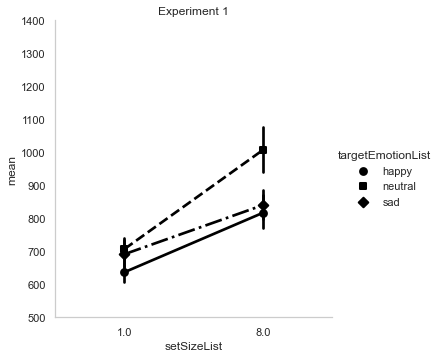

In [39]:
import pandas as pd
import seaborn as sns

# Exp 1 & TASK 2 #
expID = 1 # EXPERIMENT 
#
taskID = 1 # TASK
#
accuracy_filter = 0
#
if expID == 1:
    subList = e1_subs
    color_palette = sns.color_palette("Set1", n_colors=len(e1_subs))
    subject_color_mapping = dict(zip(e1_subs, color_palette))
    all_meansExp1 = pd.DataFrame()
    all_meansExpData = all_meansExp1
if expID == 2:
    subList = e2_subs
    color_palette = sns.color_palette("Set1", n_colors=len(e2_subs))
    subject_color_mapping = dict(zip(e2_subs, color_palette))
    all_meansExp2 = pd.DataFrame()
    all_meansExpData = all_meansExp2

if taskID == 1:
    responseVariable = 'responseTime'
    taskID = [1]
if taskID == 2:
    responseVariable = 'responses'
    taskID = [2]
if taskID in [3, 4]:
    responseVariable = 'responseTime'
    xVariable = 'distractorEmotion'
    yVariable = 'targetPresent'
    taskID = [3, 4] # change here if you want to individually look at 
else:
    xVariable = 'setSizeList'
    yVariable = 'targetEmotionList'

print("taskID is:", taskID)
filtered_df = df
"""if accuracy_filter == 1:
    filtered_df = df[df['ACC'].isin([1])]
if accuracy_filter == 0:
    filtered_df = df[df['ACC'].isin([1, 0])] """

# writing sub data jan 5, 2024
raw_tmpdata = pd.DataFrame()

for sub in subList:
    #print(sub)
    #
    tmpdata = filtered_df.loc[(filtered_df['expID'] == expID) & (filtered_df['taskID'].isin(taskID)) & (filtered_df['subID'] == sub),:]
    print("length first:", len(tmpdata))
    mean_rt = tmpdata.responseTime.mean()
    sd_rt = tmpdata.responseTime.std()
    median_rt = tmpdata.responseTime.median()
    tmpdata = tmpdata[~(tmpdata['responseTime'] >= median_rt + (2*sd_rt)) | (tmpdata['responseTime'] <= median_rt - (2*sd_rt)) ]
    print("length after dropping outlier reaction times:", len(tmpdata))
    # append rows to an empty DataFrame
    #normcfiltered_df = normcfiltered_df.append({'subs' : sub, 'mus' : fittedParameters_4[0], 'sigmas' : fittedParameters_4[1], 'setSize': 4, 'obsGender': sub_gender, 'obsEthn': sub_ethn, 'obsAge': sub_age}, ignore_index = True)
    # Append means to the all_meansExp1 DataFrame, along with subject information
    
    means = tmpdata.groupby([xVariable, yVariable, "taskID"])[responseVariable].agg(['mean', 'count']).reset_index()
    means['subID'] = sub
    all_meansExpData = pd.concat([all_meansExpData, means])
    raw_tmpdata = pd.concat([raw_tmpdata, tmpdata])
    #means = tmpdata.groupby('faceTrialID')['responses'].mean()
    # Append means to the all_meansExpData DataFrame, along with subject information
    #means = means.reset_index()
    #means['subID'] = sub
    #all_meansExpData = pd.concat([all_meansExpData, means])

#g = sns.catplot(data=normcfiltered_df, x="setSize", y="sigmas", kind="box")
g = sns.catplot(data=all_meansExpData, x=xVariable, y='mean', hue=yVariable, kind="point", palette = ['black'], errorbar = "se",
markers=['o', 's', 'D'], linestyles=['-', '--', '-.']) #, hue = "subGender"

# map data to stripplot
#g.map(sns.stripplot, 'setSizeList', 'responseTime', hue='targetEmotionList', dodge=True, alpha=0.2, ec='k', linewidth=1)
if taskID ==[1]:
    plt.ylim(500, 1400)  # Replace 'lower_limit' and 'upper_limit' with your desired values
if taskID ==[2]:
    plt.ylim(2.5, 8.3)  # Replace 'lower_limit' and 'upper_limit' with your desired values
plt.grid(visible=False)
plt.title(f"Experiment {expID}")
#g.savefig("fig_task_"+str(taskID)+"exp_"+str(expID)+"_AS_"+str(accuracy_filter)+".png", dpi=600)
g.savefig("subData/"+"exp"+str(expID)+"/fig_task_"+str(taskID)+"exp_"+str(expID)+".pdf", format = "pdf", dpi=600)

#g = sns.FacetGrid(all_meansExpData, col=yVariable, row=xVariable, hue = "subID", margin_titles=True)
#g.map(sns.scatterplot, 'subID', 'count')
    

all_meansExpData.to_csv("subData/"+"exp"+str(expID)+"/"+"task"+str(taskID)+"/"+str(taskID)+"exp_"+str(expID)+".csv")
#raw_tmpdata.to_csv("subData/"+"exp"+str(expID)+"/"+"task"+str(taskID)+"/"+"raw_tmpdata"+str(taskID)+"exp_"+str(expID)+".csv")

# Set axis labels and title
#g.set_axis_labels('Subject ID', 'Count')
#g.fig.suptitle('Scatter Plot of Count Across SubIDs', y=1.02)
# Show the plot
plt.show()
# ok seems fine.

In [40]:
raw_tmpdata.head()

,Unnamed: 0,subID,targetEmotionList,targetThetaList,responses,responseTime,targetPresent,distractorEmotion,targetLocList,ACC,taskID,setSizeList,faceTrialID,trial_type,expID
0,0,30976.0,sad,0.00,3,"4,224.80",sad,neutral,"sad,neutral,neutral,neutral,neutral,neutral,ne...",1.00,1.00,8.00,sad_7N,html-keyboard-response,1
3,3,30976.0,neutral,1.00,4,"1,055.40",0,no_face,"empty,neutral,empty,empty,empty,empty,empty,empty",1.00,1.00,1.00,neutral_single,html-keyboard-response,1
4,4,30976.0,sad,-1.00,3,"2,368.50",sad,no_face,"sad,empty,empty,empty,empty,empty,empty,empty",1.00,1.00,1.00,sad_single,html-keyboard-response,1
5,5,30976.0,neutral,0.00,4,"2,078.80",0,neutral,"neutral,neutral,neutral,neutral,neutral,neutra...",1.00,1.00,8.00,neutral_7N,html-keyboard-response,1
6,6,30976.0,sad,5.00,3,"1,591.80",sad,neutral,"neutral,neutral,neutral,neutral,neutral,sad,ne...",1.00,1.00,8.00,sad_7N,html-keyboard-response,1


In [ ]:
# again walking barefoot through the data #
from scipy.stats import t, sem
raw_tmpdata = raw_tmpdata[raw_tmpdata.setSizeList == 8]
# Get unique subIDs
subIDs = raw_tmpdata['subID'].unique()
# Define colors for each emotion category
emotion_colors = {'neutral': 'gray', 'sad': 'blue', 'happy': 'orange'}

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), sem(a)
    h = se * t.ppf((1 + confidence) / 2., n-1)
    return m, h

def mean_rt_and_sd(data):
    rt_values = data['responseTime'].values
    mean_rt = np.mean(rt_values)
    sd_rt = np.std(rt_values)
    meadian_rt = np.median(rt_values)
    return mean_rt, sd_rt, meadian_rt

# Plotting separate plots for each subID
for subID in subIDs:
    # Filter data for the current subID
    subdata = raw_tmpdata[raw_tmpdata['subID'] == subID]
    mean_rt, sd_rt, meadian_rt = mean_rt_and_sd(subdata)
    subdata = subdata[(subdata['responseTime'] >= meadian_rt - 2 * sd_rt) & (subdata['responseTime'] <= meadian_rt + 2 * sd_rt)]
    # Create subplots for each subID
    fig, ax = plt.subplots(figsize=(10, 6))

    # Loop through unique target emotion categories
    for emotion_category in subdata['targetEmotionList'].unique():
        # Filter data for the current emotion category
        subset = subdata[subdata['targetEmotionList'] == emotion_category]
        # Plot responses against row numbers for the current emotion category
        #ax.plot(subset.index, subset['responses'], label=emotion_category, marker='o')
        #ax.scatter(subset.index, subset['responses'], label=emotion_category, s=np.sqrt(subset['responseTime']) * 100, alpha=0.8)
        ax.scatter(subset.index, subset['responses'], label=emotion_category, s=np.sqrt(np.abs(subset['responseTime'])) * 10, alpha=1, color=emotion_colors[emotion_category])

        # Annotate mean response for each emotion category
        #mean_response = subset['responses'].mean()
        #mean_response, ci_response = mean_confidence_interval(subset['responses'])
        mean_response, ci_response = mean_confidence_interval(subset['responses'])
        ax.annotate(f'Mean: {mean_response:.2f}', xy=(subset.index.max(), mean_response), xytext=(10, 0), textcoords='offset points', ha='left', va='center', color=emotion_colors[emotion_category], fontsize = 30)
        #std_response = subset['responses'].std()

        ax.bar(subset.index.max() + 1, mean_response, color=emotion_colors[emotion_category], width=0.5, yerr=ci_response, capsize=5) #label=f'Mean {emotion_category}'
        #ax.bar(subset.index.max() + 1, mean_response, color=emotion_colors[emotion_category], width=0.5, label=f'Mean {emotion_category}', yerr=std_response, capsize=5)


    # Set labels and title for the subplot
    ax.set_xlabel('Row Numbers')
    ax.set_ylabel('Responses')
    ax.set_title(f'Responses for Each Target Emotion Category (subID: {subID})')
    ax.legend()

    # Set y-axis limits
    #ax.set_ylim(-0.2, 10.3)
    # Show the subplot
     # Draw horizontal lines at y=4, y=5, and y=6
    #ax.hlines([4, 4.5, 5], subset.index.min()-1, subset.index.max()+1, colors=['blue', 'orange', 'gray'], linestyles='dashed', label='Horizontal Lines')

    plt.show()

In [ ]:
# based on my barefoot walk I claim that these subs were not doing this taskID 2 #
# sub1, sub9, sub12, sub13, sub14, sub20, sub42, sub43, sub53, sub55, sub60. 

# again for e1: 83835, 23674 bence atilmali

In [ ]:
# Create a new column 'correct' with values 1 for correct and 0 for incorrect
# Conditions: For non-neutral emotions, if emotion is happy and responses are >= 5, or if emotion is sad and responses are <= 4, it is correct
raw_tmpdata['correct'] = np.nan  # Initialize 'correct' column with 0

# Update 'correct' column based on conditions
mask_happy = (raw_tmpdata['targetEmotionList'] == 'happy') & (raw_tmpdata['responses'] >= 5)
mask_sad = (raw_tmpdata['targetEmotionList'] == 'sad') & (raw_tmpdata['responses'] <= 5)
mask_happyIC = (raw_tmpdata['targetEmotionList'] == 'happy') & (raw_tmpdata['responses'] < 5)
mask_sadIC = (raw_tmpdata['targetEmotionList'] == 'sad') & (raw_tmpdata['responses'] > 5)
raw_tmpdata.loc[mask_happy | mask_sad, 'correct'] = 1
raw_tmpdata.loc[mask_happyIC | mask_sadIC, 'correct'] = 0

# Get unique subIDs
subIDs = raw_tmpdata['subID'].unique()

# Calculate overall accuracy for each subID
accuracies = raw_tmpdata.groupby('subID')['correct'].mean().reset_index()
# Calculate mean response time for each subID
mean_response_time = raw_tmpdata.groupby('subID')['responseTime'].mean().reset_index()
# Merge accuracies and mean_response_time DataFrames on 'subID'
accuracies = pd.merge(accuracies, mean_response_time, on='subID', how='left')

# Plotting scatter plot
plt.figure(figsize=(24, 6))
sns.scatterplot(x='subID', y='correct', data=accuracies, hue='subID', s=accuracies['responseTime'] *1, palette='viridis', legend = False, alpha = 0.5)

for index, row in accuracies.iterrows():
    plt.text(row['subID'], row['correct'], row['subID'], ha='center', va='bottom', fontsize = 14)

plt.title('Accuracy for Each subID')
plt.xlabel('subID')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits
plt.xticks([])
plt.axhline(y=0.5, color='red', linestyle='--', linewidth=2, label='Threshold')

#plt.savefig("accuracyPlot.pdf", format = "pdf", dpi=600)

plt.show() 

In [ ]:
# similar to the above accuracy plot, I want to see mean responseTime # 

# Calculate mean response time for each subID
mean_response_time = raw_tmpdata.groupby('subID')['responseTime'].mean().reset_index()

# Plotting scatter plot for mean response time
plt.figure(figsize=(16, 10)) #1000
scatter_plot = sns.scatterplot(x='subID', y='responseTime', data=mean_response_time, hue='subID', s=mean_response_time['responseTime']*1, palette='viridis', legend=False, alpha = 0.5)

# Annotate the plot with subID values
for index, row in mean_response_time.iterrows():
    plt.text(row['subID'], row['responseTime'], f'{row["responseTime"]:.2f}', ha='center', va='bottom', fontsize = 14)
    plt.text(row['subID'], row['responseTime'], row['subID'], ha='left', va='top', fontsize = 20)


plt.title('Mean Response Time for Each subID')
plt.xlabel('subID')
plt.ylabel('Mean Response Time')
#plt.ylim(bottom=0)  # Set y-axis lower limit to 0
plt.xticks([])
# Show the plot
plt.savefig("RT_e2_t1.pdf", format = "pdf", dpi=600)
plt.show()

In [ ]:
# Fit a normal distribution to the data
mu, std = norm.fit(raw_tmpdata['responseTime'])

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(raw_tmpdata['responseTime'], bins=20, kde=False, color='skyblue', label='Response Time Histogram')

# Plot the PDF (Probability Density Function) of the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label=f'Fit result: $\mu={mu:.2f}$, $\sigma={std:.2f}$')

plt.title('Fitted Normal Distribution for Response Time')
plt.xlabel('Response Time')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

mean reaction time is: 775.2552371239154
std reaction time is: 341.32592769408143
Mean response time for subIDs above the threshold:
89391.0: 1507.20
Mean response time for subIDs above the threshold:
89391.0: 1507.20

Mean response time for subIDs below the threshold:
70350.0: 637.85
90456.0: 601.09


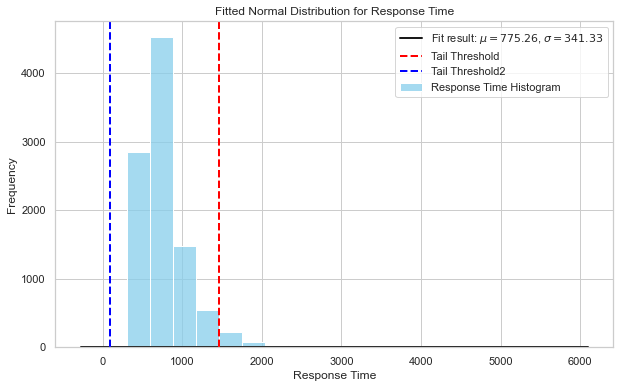

SubIDs in the tail of the distribution: ['89391.0']
SubIDs2 in the tail of the distribution: ['70350.0' '90456.0']


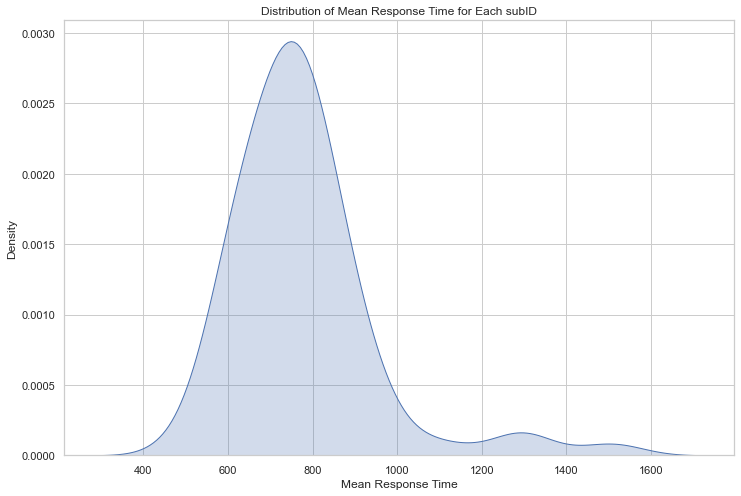

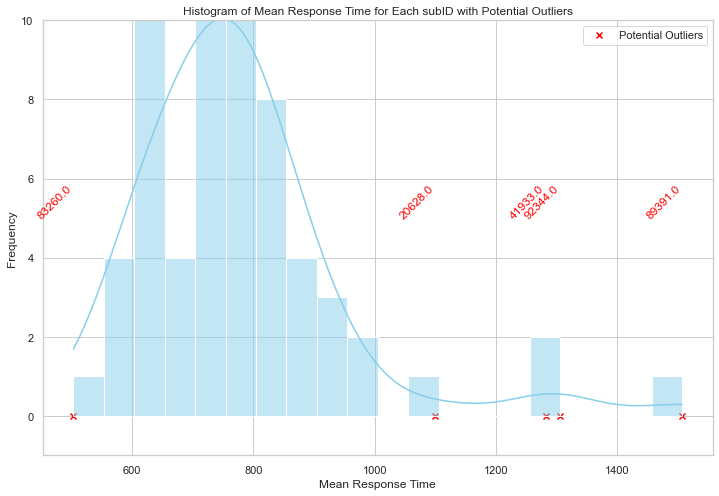

In [41]:
# Fit a normal distribution to the data
mu, std = norm.fit(raw_tmpdata['responseTime'])
print("mean reaction time is:", mu)
print("std reaction time is:", std)
# Set the threshold (e.g., 2 standard deviations from the mean)
threshold = mu + 2 * std
threshold2 = mu - 2 * std
# Identify subIDs with response times beyond the threshold
#tail_subIDs_combined = raw_tmpdata.loc[(raw_tmpdata['responseTime'] > threshold) | (raw_tmpdata['responseTime'] < threshold2), 'subID'].unique()
# Identify subIDs with response times beyond the threshold
#tail_subIDs = raw_tmpdata.loc[raw_tmpdata['responseTime'] > threshold, 'subID'].unique()
#print(raw_tmpdata.loc[raw_tmpdata['responseTime'] > threshold, ['subID', 'responseTime']])
# Identify subIDs with mean response times beyond the threshold
mean_response_time_by_subID = raw_tmpdata.groupby('subID')['responseTime'].mean().reset_index()

tail_subIDs = mean_response_time_by_subID.loc[mean_response_time_by_subID['responseTime'] > threshold, 'subID'].unique()

# Print mean response time for subIDs above the threshold
print("Mean response time for subIDs above the threshold:")
for subID in tail_subIDs:
    mean_response_time = mean_response_time_by_subID.loc[mean_response_time_by_subID['subID'] == subID, 'responseTime'].values[0]
    print(f"{subID}: {mean_response_time:.2f}")

# Identify subIDs with response times below the threshold
tail_subIDs2 = raw_tmpdata.loc[raw_tmpdata['responseTime'] < threshold2, 'subID'].unique()

# Print mean response time for subIDs above the threshold
print("Mean response time for subIDs above the threshold:")
for subID in tail_subIDs:
    mean_response_time = raw_tmpdata.loc[raw_tmpdata['subID'] == subID, 'responseTime'].mean()
    print(f"{subID}: {mean_response_time:.2f}")

# Print mean response time for subIDs below the threshold
print("\nMean response time for subIDs below the threshold:")
for subID in tail_subIDs2:
    mean_response_time = raw_tmpdata.loc[(raw_tmpdata['subID'] == subID) & (raw_tmpdata['responseTime'] >= 0), 'responseTime'].mean()
    print(f"{subID}: {mean_response_time:.2f}")
# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(raw_tmpdata['responseTime'], bins=20, kde=False, color='skyblue', label='Response Time Histogram')

# Plot the PDF (Probability Density Function) of the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label=f'Fit result: $\mu={mu:.2f}$, $\sigma={std:.2f}$')

# Highlight the tail of the distribution
plt.axvline(threshold, color='red', linestyle='--', linewidth=2, label='Tail Threshold')
plt.axvline(threshold2, color='blue', linestyle='--', linewidth=2, label='Tail Threshold2')

plt.title('Fitted Normal Distribution for Response Time')
plt.xlabel('Response Time')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

# Display subIDs in the tail
print("SubIDs in the tail of the distribution:", tail_subIDs)
print("SubIDs2 in the tail of the distribution:", tail_subIDs2)


# Create a seaborn kdeplot
plt.figure(figsize=(12, 8))
sns.kdeplot(data=mean_response_time_by_subID, x='responseTime', fill=True)

# Add labels and title
plt.xlabel('Mean Response Time')
plt.ylabel('Density')
plt.title('Distribution of Mean Response Time for Each subID')

# Show the plot
plt.show()

# Calculate mean and standard deviation
mean_response_time = mean_response_time_by_subID['responseTime'].mean()
std_response_time = mean_response_time_by_subID['responseTime'].std()

# Define a threshold for identifying outliers (e.g., 2 standard deviations)
outlier_threshold = 1.5

# Create a histogram
plt.figure(figsize=(12, 8))
sns.histplot(data=mean_response_time_by_subID, x='responseTime', bins=20, kde=True, color='skyblue')

# Identify potential outliers
outliers = mean_response_time_by_subID[
    (mean_response_time_by_subID['responseTime'] > mean_response_time + outlier_threshold * std_response_time) |
    (mean_response_time_by_subID['responseTime'] < mean_response_time - outlier_threshold * std_response_time)
]

# Mark potential outliers on the plot
plt.scatter(outliers['responseTime'], [0] * len(outliers), color='red', label='Potential Outliers', marker='x')
# Label potential outliers with subID
for index, row in outliers.iterrows():
    plt.annotate(row['subID'], (row['responseTime'], 5), color='red', rotation=45, ha='right')

# Add labels and title
plt.xlabel('Mean Response Time')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Response Time for Each subID with Potential Outliers')

# Add legend
plt.legend()
plt.ylim(-1,10)
# Show the plot
plt.show()

In [42]:
# ok finally I will draw this accuracy x response time ellipse # 

def mahalanobis_distance(data, mean, cov_inv): 
    diff = data - mean
    md = np.sqrt(np.dot(np.dot(diff, cov_inv), diff.T))
    return md

# Scatter plot
plt.figure(figsize=(15, 12))
sns.scatterplot(x='correct', y='responseTime', data=accuracies, color='blue', alpha=0.85)

# Annotate each point with subID
for index, row in accuracies.iterrows():
    plt.text(row['correct'], row['responseTime'], row['subID'], fontsize =15, ha='right', va='bottom')

# Calculate mean and covariance matrix
mean_values = accuracies[['correct', 'responseTime']].mean().values 
cov_matrix = accuracies[['correct', 'responseTime']].cov().values #The covariance matrix provides information about how the two variables vary together.  
cov_inv = np.linalg.inv(cov_matrix) #The inverse of the covariance matrix is used in Mahalanobis distance calculations

# Set the threshold for outlier detection
threshold = chi2.ppf(0.85, df=1)  # Assuming 2 degrees of freedom for two variables
# ppf: Percent point function, also known as the inverse cumulative distribution function (CDF). It returns the value at which the given cumulative distribution function (CDF) is equal to the specified probability.

# Identify outliers using Mahalanobis distance
accuracies['mahalanobis'] = accuracies.apply(lambda row: mahalanobis_distance(row[['correct', 'responseTime']].values, mean_values, cov_inv), axis=1)
outliers = accuracies[accuracies['mahalanobis'] > threshold]

# Plot Mahalanobis distance ellipse
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1])) # second vector for rotation
chi2_val = chi2.ppf(0.95, df=1)
scale_x = np.sqrt(chi2_val * eigenvalues[0])
scale_y = np.sqrt(chi2_val * eigenvalues[1])
# Create ellipse
ellipse = Ellipse(xy=mean_values, width=scale_x * 2, height=scale_y * 2, angle=angle, edgecolor='green', fill=False, linewidth=2, alpha=0.5) #sets the full height of the ellipse.
plt.gca().add_patch(ellipse)


# Highlight outliers
sns.scatterplot(x='correct', y='responseTime', data=outliers, color='red', marker='x', s=100, label='Outliers')

plt.axhline(y=mean_values[1], color='green', linestyle='--', label='Mean Response Time')
plt.axvline(x=mean_values[0], color='red', linestyle='--', label='Mean ACC')

plt.xlabel('Mean correct')
plt.ylabel('Mean Response Time')
plt.title('Scatter Plot of Mean ACC per subID with Outliers Highlighted')
plt.legend(title='expID')
plt.ylim(-1,3)
plt.xlim(0, 1.5)
plt.savefig("cleanProcess/ellipseData_totalExp"+str(taskID)+"exp_"+str(expID)+".pdf", format='pdf', dpi = 600)
plt.show()


ValueError: Image size of 896x420910 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1080x864 with 1 Axes>

In [ ]:
# final: I thnik these people should be removed. 

In [ ]:
# individual means are: #
aggregated_data = all_meansExpData.groupby([xVariable, yVariable, "taskID"])['mean'].agg(['mean', 'sem']).reset_index()
latex_table = aggregated_data.to_latex(caption='Your Table Caption', index = False)
print(latex_table)


In [ ]:
# for task 3 & 4 run below, otherwise skip to the next block #

import pandas as pd

# Assuming 'taskID' and 'targetPresent' are column names in your DataFrame (all_meansExpData)
all_meansExpData['taskID'] = all_meansExpData['taskID'].astype('category')
all_meansExpData['targetPresent'] = all_meansExpData['targetPresent'].astype('category')

# Now, you can use them in your ANOVA formula
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'mean ~ C(distractorEmotion) + C(targetPresent) + C(taskID) + C(distractorEmotion):C(targetPresent) + C(distractorEmotion):C(taskID) + C(targetPresent):C(taskID) + C(distractorEmotion):C(targetPresent):C(taskID)'
rm_anova_result = sm.stats.anova_lm(ols(formula, data=all_meansExpData).fit())

# Print the ANOVA table
print(rm_anova_result)

# Filter data for set size 1 happy, set size 8 happy, set size 1 sad, and set size 8 sad
task3_happyDist = all_meansExpData[(all_meansExpData['taskID'] == 3) & (all_meansExpData['distractorEmotion'] == 'happy') & (all_meansExpData['targetPresent'] == "1")].set_index('subID')['mean']
task3_sadDist = all_meansExpData[(all_meansExpData['taskID'] == 3) & (all_meansExpData['distractorEmotion'] == 'sad') & (all_meansExpData['targetPresent'] == "1")].set_index('subID')['mean']
task4_happyDist = all_meansExpData[(all_meansExpData['taskID'] == 4) & (all_meansExpData['distractorEmotion'] == 'happy') & (all_meansExpData['targetPresent'] == "1")].set_index('subID')['mean']
task4_sadDist = all_meansExpData[(all_meansExpData['taskID'] == 4) & (all_meansExpData['distractorEmotion'] == 'sad') & (all_meansExpData['targetPresent'] == "1")].set_index('subID')['mean']

# Calculate delta_happy and delta_sad for both taskID 3 and 4
delta_happy_3 = task3_happyDist# - task4_happyDist
delta_sad_3 = task3_sadDist# - task4_sadDist

# Create a new DataFrame with subID, delta_happy, and delta_sad for taskID 3
delta_df_3 = pd.DataFrame({'subID': delta_happy_3.index, 'delta_happy': delta_happy_3.values, 'delta_sad': delta_sad_3.values, 'taskID': 3})

# Calculate delta_happy and delta_sad for taskID 4
delta_happy_4 = task4_happyDist# - task3_happyDist
delta_sad_4 = task4_sadDist# - task3_sadDist

# Create a new DataFrame with subID, delta_happy, and delta_sad for taskID 4
delta_df_4 = pd.DataFrame({'subID': delta_happy_4.index, 'delta_happy': delta_happy_4.values, 'delta_sad': delta_sad_4.values, 'taskID': 4})

# Combine both dataframes
delta_df_combined = pd.concat([delta_df_3, delta_df_4])

# Generate a unique color for each subID | tab20b sahane backujp
unique_subids = delta_df_combined['subID'].unique()
subid_colors = {subid: sns.color_palette('cividis', n_colors=len(unique_subids))[i] for i, subid in enumerate(unique_subids)}

# Map subID to color in the DataFrame
delta_df_combined['subID_color'] = delta_df_combined['subID'].map(subid_colors)

# Create a scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='delta_sad', y='delta_happy', hue='subID_color', data=delta_df_combined, alpha=0.7, palette='cividis') ##twilight_shifted #tab20c

# Add a 1:1 line
plt.axline((0, 0), slope=1, color='black', linestyle='--', label='1:1 Line', alpha=0.6)

# Connect dots with lines by subID
for subID in delta_df_combined['subID'].unique():
    subset = delta_df_combined[delta_df_combined['subID'] == subID]
    # plt.plot(subset['delta_sad'], subset['delta_happy'], marker='o', linestyle='--', markersize=5, alpha=0.2, label=subID)
    # Plot arrows
    for i in range(len(subset) - 1):
        # Calculate the direction (dx, dy) from the current point to the next point
        dx = subset['delta_sad'].values[i + 1] - subset['delta_sad'].values[i]
        dy = subset['delta_happy'].values[i + 1] - subset['delta_happy'].values[i]
        arrow_color = subid_colors[subID]

        #magnitude = (dx**2 + dy**2)**0.5
        # Scale arrowhead size based on the magnitude
        #scale_factor = 0.01  # Adjust this factor to control the scaling
        #head_width = magnitude * scale_factor
        #head_length = magnitude * scale_factor * 1.5  # Adjust this factor to control the length
        
        
        # Plot the arrow from the current point to the next point
        plt.arrow(subset['delta_sad'].values[i], subset['delta_happy'].values[i], dx, dy,
                  head_width=20, fc=arrow_color, ec=arrow_color, alpha=0.6, linestyle = "dashed")

# Add axes labels and title
plt.xlabel('RT w/ Sad Distractors')
plt.ylabel('RT w/ Happy Distractors')
plt.title('Scatterplot of RT to neutral targets when distractors were Sad vs. Happy for TaskID 3 and 4')
plt.ylim(350, 1500)
plt.xlim(350, 1500)
# Add legend
plt.legend().set_visible(False)
plt.savefig("deltas/"+"delGraphs"+str(taskID)+"exp_"+str(expID)+"_AS_"+str(accuracy_filter)+".pdf", format = "pdf", dpi=600)
# Show the plot
plt.show()

""" # Perform t-test
t_stat, p_value = ttest_rel(delta_df_combined[delta_df_combined['taskID'] == 3]['delta_happy'], delta_df_combined[delta_df_combined['taskID'] == 3]['delta_sad'])
print(f"T-test for TaskID 3: t = {t_stat}, p = {p_value}")

t_stat, p_value = ttest_rel(delta_df_combined[delta_df_combined['taskID'] == 4]['delta_happy'], delta_df_combined[delta_df_combined['taskID'] == 4]['delta_sad'])
print(f"T-test for TaskID 4: t = {t_stat}, p = {p_value}") """

In [ ]:
# again for task 3 & 4 run below, otherwise skip to the next block #
import pandas as pd

# Assuming 'taskID' and 'targetPresent' are column names in your DataFrame (all_meansExpData)
all_meansExpData['taskID'] = all_meansExpData['taskID'].astype('category')
all_meansExpData['targetPresent'] = all_meansExpData['targetPresent'].astype('category')

# Now, you can use them in your ANOVA formula
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'mean ~ C(distractorEmotion) + C(targetPresent) + C(taskID) + C(distractorEmotion):C(targetPresent) + C(distractorEmotion):C(taskID) + C(targetPresent):C(taskID) + C(distractorEmotion):C(targetPresent):C(taskID)'
rm_anova_result = sm.stats.anova_lm(ols(formula, data=all_meansExpData).fit())

# Print the ANOVA table
print(rm_anova_result)

# Filter data for set size 1 happy, set size 8 happy, set size 1 sad, and set size 8 sad
task3_happyDist = all_meansExpData[(all_meansExpData['taskID'] == 3) & (all_meansExpData['distractorEmotion'] == 'happy') & (all_meansExpData['targetPresent'] == "1")].set_index('subID')['mean']
task3_sadDist = all_meansExpData[(all_meansExpData['taskID'] == 3) & (all_meansExpData['distractorEmotion'] == 'sad') & (all_meansExpData['targetPresent'] == "1")].set_index('subID')['mean']
task4_happyDist = all_meansExpData[(all_meansExpData['taskID'] == 4) & (all_meansExpData['distractorEmotion'] == 'happy') & (all_meansExpData['targetPresent'] == "1")].set_index('subID')['mean']
task4_sadDist = all_meansExpData[(all_meansExpData['taskID'] == 4) & (all_meansExpData['distractorEmotion'] == 'sad') & (all_meansExpData['targetPresent'] == "1")].set_index('subID')['mean']

# Calculate delta_happy and delta_sad for both taskID 3 and 4
delta_happy_3 = task3_happyDist# - task4_happyDist
delta_sad_3 = task3_sadDist# - task4_sadDist

# Create a new DataFrame with subID, delta_happy, and delta_sad for taskID 3
delta_df_3 = pd.DataFrame({'subID': delta_happy_3.index, 'delta_happy': delta_happy_3.values, 'delta_sad': delta_sad_3.values, 'taskID': 3})

# Calculate delta_happy and delta_sad for taskID 4
delta_happy_4 = task4_happyDist# - task3_happyDist
delta_sad_4 = task4_sadDist# - task3_sadDist

# Create a new DataFrame with subID, delta_happy, and delta_sad for taskID 4
delta_df_4 = pd.DataFrame({'subID': delta_happy_4.index, 'delta_happy': delta_happy_4.values, 'delta_sad': delta_sad_4.values, 'taskID': 4})

# Combine both dataframes
delta_df_combined = pd.concat([delta_df_3, delta_df_4])

# Generate a unique color for each subID | tab20b sahane backujp
unique_subids = delta_df_combined['subID'].unique()
subid_colors = {subid: sns.color_palette('cividis', n_colors=len(unique_subids))[i] for i, subid in enumerate(unique_subids)}

# Map subID to color in the DataFrame
delta_df_combined['subID_color'] = delta_df_combined['subID'].map(subid_colors)

# Create a scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='delta_sad', y='delta_happy', hue='subID_color', data=delta_df_combined, alpha=0.7, palette='cividis') ##twilight_shifted #tab20c

# Add a 1:1 line
plt.axline((0, 0), slope=1, color='black', linestyle='--', label='1:1 Line', alpha=0.6)

# Connect dots with lines by subID
for subID in delta_df_combined['subID'].unique():
    subset = delta_df_combined[delta_df_combined['subID'] == subID]
    # plt.plot(subset['delta_sad'], subset['delta_happy'], marker='o', linestyle='--', markersize=5, alpha=0.2, label=subID)
    # Plot arrows
    for i in range(len(subset) - 1):
        # Calculate the direction (dx, dy) from the current point to the next point
        dx = subset['delta_sad'].values[i + 1] - subset['delta_sad'].values[i]
        dy = subset['delta_happy'].values[i + 1] - subset['delta_happy'].values[i]
        arrow_color = subid_colors[subID]

        #magnitude = (dx**2 + dy**2)**0.5
        # Scale arrowhead size based on the magnitude
        #scale_factor = 0.01  # Adjust this factor to control the scaling
        #head_width = magnitude * scale_factor
        #head_length = magnitude * scale_factor * 1.5  # Adjust this factor to control the length
        
        
        # Plot the arrow from the current point to the next point
        plt.arrow(subset['delta_sad'].values[i], subset['delta_happy'].values[i], dx, dy,
                  head_width=20, fc=arrow_color, ec=arrow_color, alpha=0.6, linestyle = "dashed")

# Add axes labels and title
plt.xlabel('RT w/ Sad Distractors')
plt.ylabel('RT w/ Happy Distractors')
plt.title('Scatterplot of RT to neutral targets when distractors were Sad vs. Happy for TaskID 3 and 4')
plt.ylim(350, 1500)
plt.xlim(350, 1500)
# Add legend
plt.legend().set_visible(False)
plt.savefig("deltas/"+"delGraphs"+str(taskID)+"exp_"+str(expID)+"_AS_"+str(accuracy_filter)+".pdf", format = "pdf", dpi=600)
# Show the plot
plt.show()

""" # Perform t-test
t_stat, p_value = ttest_rel(delta_df_combined[delta_df_combined['taskID'] == 3]['delta_happy'], delta_df_combined[delta_df_combined['taskID'] == 3]['delta_sad'])
print(f"T-test for TaskID 3: t = {t_stat}, p = {p_value}")

t_stat, p_value = ttest_rel(delta_df_combined[delta_df_combined['taskID'] == 4]['delta_happy'], delta_df_combined[delta_df_combined['taskID'] == 4]['delta_sad'])
print(f"T-test for TaskID 4: t = {t_stat}, p = {p_value}") """

In [43]:
# Perform repeated measures ANOVA
rm_anova = pg.rm_anova(dv='mean', within=[xVariable, yVariable], subject='subID', data=all_meansExpData)

# Print the results
print(rm_anova)
#latex_table = rm_anova.to_latex(index = False)
selected_columns = rm_anova[['Source', 'MS', 'F', 'p-unc', 'ng2']]
latex_table = selected_columns.to_latex(index=False, escape=False, float_format="{:0.2f}".format)

# Print or save the LaTeX code
print(latex_table)


                            Source           SS  ddof1  ddof2           MS  \
0                      setSizeList 4,485,864.23      1     67 4,485,864.23   
1                targetEmotionList 1,218,885.75      2    134   609,442.87   
2  setSizeList * targetEmotionList   435,072.66      2    134   217,536.33   

       F  p-unc  p-GG-corr  ng2  eps  
0 196.69   0.00       0.00 0.22 1.00  
1  59.68   0.00       0.00 0.07 0.72  
2  24.93   0.00       0.00 0.03 0.84  
\begin{tabular}{lrrrr}
\toprule
                         Source &         MS &      F &  p-unc &  ng2 \\
\midrule
                    setSizeList & 4485864.23 & 196.69 &   0.00 & 0.22 \\
              targetEmotionList &  609442.87 &  59.68 &   0.00 & 0.07 \\
setSizeList * targetEmotionList &  217536.33 &  24.93 &   0.00 & 0.03 \\
\bottomrule
\end{tabular}



In [ ]:

pairwise_results = pg.pairwise_ttests(dv='mean', within=[xVariable, yVariable], subject='subID', data=all_meansExpData,  padjust = "bonf")
pairwise_results

selected_columns = pairwise_results[['A', 'B', 'Paired', 'T', 'dof', 'alternative', 'p-unc', 'p-corr', 'BF10', 'hedges']]
selected_columns['p-unc'] = selected_columns['p-unc'].round(2).apply(lambda x: f'\\textbf{{{x}}}' if x < 0.05 else x)
latex_table = selected_columns.to_latex(index=False, escape=False, float_format="{:0.2f}".format)

# Print or save the LaTeX code
print(latex_table)

In [ ]:
# for taskID 3 and 4

rm_anova = pg.rm_anova(dv='mean', within=[xVariable, yVariable, expID], subject='subID', data=all_meansExpData)


In [ ]:
# Post hoc pairwise comparisons for targetEmotionList within each setSizeList
# BF10: Bayes Factor for the comparison, providing evidence for or against the alternative hypothesis.
# hedges: Hedges' g effect size estimate.
posthoc_result_size1 = pg.pairwise_ttests(dv='mean', within='targetEmotionList', subject='subID', data=all_meansExpData[all_meansExpData['setSizeList'] == 1], padjust = "bonf")
posthoc_result_size8 = pg.pairwise_ttests(dv='mean', within='targetEmotionList', subject='subID', data=all_meansExpData[all_meansExpData['setSizeList'] == 8], padjust = "bonf")

# Print the post hoc results
print("Post hoc results for setSizeList == 1:")
print(posthoc_result_size1)

print("\nPost hoc results for setSizeList == 8:")
print(posthoc_result_size8)

selected_columns = posthoc_result_size1[['A', 'B', 'Paired', 'T', 'dof', 'alternative', 'p-unc', 'BF10', 'hedges']]
selected_columns['p-unc'] = selected_columns['p-unc'].round(2).apply(lambda x: f'\\textbf{{{x}}}' if x < 0.05 else x)
latex_table = selected_columns.to_latex(index=False, escape=False, float_format="{:0.2f}".format)

# Print or save the LaTeX code
print(latex_table)

selected_columns = posthoc_result_size8[['A', 'B', 'Paired', 'T', 'dof', 'alternative', 'p-unc', 'BF10', 'hedges']]
selected_columns['p-unc'] = selected_columns['p-unc'].round(2).apply(lambda x: f'\\textbf{{{x}}}' if x < 0.05 else x)
latex_table = selected_columns.to_latex(index=False, escape=False, float_format="{:0.2f}".format)

# Print or save the LaTeX code
print(latex_table)

      subID  delta_happy  delta_sad
0   30976.0       182.40     326.97
1   86935.0       154.25     127.12
2    6873.0       135.81     266.64
3   66374.0        -0.50      59.42
4   41933.0       867.13     191.58
..      ...          ...        ...
63  80572.0       127.50      91.90
64  74236.0       181.17     154.41
65  11525.0        76.68     172.96
66  90456.0       153.41     146.12
67  65699.0       123.57     142.26

[68 rows x 3 columns]


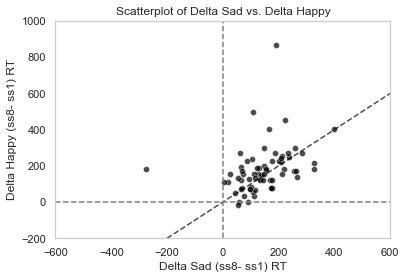

T-test: t = 1.8095778898756298, p = 0.07484684049712127
\begin{tabular}{lrrr}
\toprule
  subID &  delta\_happy &  delta\_sad &    diff \\
\midrule
30976.0 &       182.40 &     326.97 & -144.58 \\
86935.0 &       154.25 &     127.12 &   27.13 \\
 6873.0 &       135.81 &     266.64 & -130.83 \\
66374.0 &        -0.50 &      59.42 &  -59.92 \\
41933.0 &       867.13 &     191.58 &  675.55 \\
93314.0 &       118.99 &     168.68 &  -49.69 \\
52309.0 &       -18.16 &      52.65 &  -70.80 \\
49272.0 &       109.98 &      19.10 &   90.88 \\
71354.0 &       201.47 &     147.09 &   54.38 \\
  311.0 &        31.84 &     111.66 &  -79.82 \\
16190.0 &       178.83 &     153.82 &   25.01 \\
67970.0 &       270.57 &     186.67 &   83.89 \\
46140.0 &       249.34 &     237.55 &   11.80 \\
84411.0 &        53.84 &     108.31 &  -54.47 \\
20628.0 &       451.04 &     223.45 &  227.59 \\
92344.0 &       279.95 &     667.57 & -387.62 \\
82286.0 &        77.48 &     177.57 & -100.10 \\
96066.0 &       236.

In [44]:
# Filter data for set size 1 happy, set size 8 happy, set size 1 sad, and set size 8 sad
set1_happy = all_meansExpData[(all_meansExpData['setSizeList'] == 1) & (all_meansExpData['targetEmotionList'] == 'happy')].set_index('subID')['mean']
set8_happy = all_meansExpData[(all_meansExpData['setSizeList'] == 8) & (all_meansExpData['targetEmotionList'] == 'happy')].set_index('subID')['mean']
set1_sad = all_meansExpData[(all_meansExpData['setSizeList'] == 1) & (all_meansExpData['targetEmotionList'] == 'sad')].set_index('subID')['mean']
set8_sad = all_meansExpData[(all_meansExpData['setSizeList'] == 8) & (all_meansExpData['targetEmotionList'] == 'sad')].set_index('subID')['mean']

# Calculate delta_happy and delta_sad
delta_happy = set8_happy - set1_happy
delta_sad = set8_sad - set1_sad

# Create a new DataFrame with subID, delta_happy, and delta_sad
delta_df = pd.DataFrame({'subID': delta_happy.index, 'delta_happy': delta_happy.values, 'delta_sad': delta_sad.values})

# Display the resulting DataFrame
print(delta_df)
# Create a scatterplot
sns.scatterplot(x='delta_sad', y='delta_happy', data=delta_df, alpha = 0.7, color = "black")
plt.axline((0, 0), slope=1, color='black', linestyle='--', label='1:1 Line', alpha = 0.7)

plt.axhline(y=0, linestyle="--", color="gray")  # Horizontal line at y=0 with a blue dashed line
plt.axvline(x=0, linestyle="--", color="gray")   # Vertical line at x=0 with a red dashed line
# Set plot labels and title
if taskID == [1]:
    axisLabel = "RT"
else:
    axisLabel = "Curvature"

plt.xlabel('Delta Sad (ss8- ss1) ' + axisLabel)
plt.ylabel('Delta Happy (ss8- ss1) ' + axisLabel)
plt.title('Scatterplot of Delta Sad vs. Delta Happy')
if taskID ==[1]:
    plt.ylim(-200, 1000)  
    plt.xlim(-600, 600)
if taskID ==[2]:
    plt.ylim(-3.7, 7.2)  
    plt.xlim(-1.8, 3.2)

plt.grid(visible=False)

# Show the plot
plt.savefig("deltas/"+"delGraphs"+str(taskID)+"exp_"+str(expID)+"_AS_"+str(accuracy_filter)+".pdf", format = "pdf", dpi=600)
plt.show()
# it looks like there is more distortion on the sad than on the happy from an observer-level point of view. 
delta_df['diff'] = delta_df['delta_happy'] - delta_df['delta_sad']
t_stat, p_value = ttest_rel(delta_df['delta_happy'], delta_df['delta_sad'])

print(f"T-test: t = {t_stat}, p = {p_value}")


print(delta_df.to_latex(index=False))

In [45]:
latex_table = delta_df[['subID', 'delta_happy', 'delta_sad', 'diff']].to_latex(index=False)

# Print or save the LaTeX code
print(latex_table)

\begin{tabular}{lrrr}
\toprule
  subID &  delta\_happy &  delta\_sad &    diff \\
\midrule
30976.0 &       182.40 &     326.97 & -144.58 \\
86935.0 &       154.25 &     127.12 &   27.13 \\
 6873.0 &       135.81 &     266.64 & -130.83 \\
66374.0 &        -0.50 &      59.42 &  -59.92 \\
41933.0 &       867.13 &     191.58 &  675.55 \\
93314.0 &       118.99 &     168.68 &  -49.69 \\
52309.0 &       -18.16 &      52.65 &  -70.80 \\
49272.0 &       109.98 &      19.10 &   90.88 \\
71354.0 &       201.47 &     147.09 &   54.38 \\
  311.0 &        31.84 &     111.66 &  -79.82 \\
16190.0 &       178.83 &     153.82 &   25.01 \\
67970.0 &       270.57 &     186.67 &   83.89 \\
46140.0 &       249.34 &     237.55 &   11.80 \\
84411.0 &        53.84 &     108.31 &  -54.47 \\
20628.0 &       451.04 &     223.45 &  227.59 \\
92344.0 &       279.95 &     667.57 & -387.62 \\
82286.0 &        77.48 &     177.57 & -100.10 \\
96066.0 &       236.04 &     103.13 &  132.91 \\
62968.0 &        75.28 &   

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from tikzplotlib import save as tikz_save

# Assuming all_meansExpData is your DataFrame
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a point plot
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=all_meansExpData, x="targetEmotionList", y="mean", hue="setSizeList",
    dodge=True, alpha=.6, palette="Set1", jitter=True
)
sns.pointplot(
    data=all_meansExpData, x="targetEmotionList", y="mean", hue = "setSizeList", palette="Set1", 
    dodge=.4, linestyle="none", errorbar=None,
    marker="_", markersize=20, markeredgewidth=3,
)

if taskID ==1:
    plt.ylim(500, 1400)  # Replace 'lower_limit' and 'upper_limit' with your desired values


# Set labels and title
plt.xlabel('Target Emotion List')
plt.ylabel('mean RT')
plt.title('Mean RT per Target Emotion List with Connected SubIDs')

# Show the legend
plt.legend(title='Set Size List')

plt.savefig('subData/subData'+str(taskID)+"exp_"+str(expID)+"_AS_"+str(accuracy_filter)+".png") 
# Show the plot
plt.savefig("subData/subData"+str(taskID)+"exp_"+str(expID)+"_AS_"+str(accuracy_filter)+".pdf", format='pdf')
#tikz_save('your_plot.tikz')

# Assuming all_meansExpData is your DataFrame
grouped_data = all_meansExpData.groupby(['setSizeList', 'targetEmotionList', 'subID'])['mean'].agg(['mean', 'sem']).reset_index()
grouped_data2 = all_meansExpData.groupby(['setSizeList', 'targetEmotionList'])['mean'].agg(['mean', 'sem']).reset_index()

# Create a pivot table from the grouped data
pivot_table = grouped_data2.pivot_table(values=['mean', 'sem'], index='targetEmotionList', columns='setSizeList')

pivot_table = pivot_table.round(2)
latex_table = pivot_table.to_latex(escape=False, multicolumn_format='c', multicolumn=True)

# Print the LaTeX code to the console
print(latex_table)

plt.show()


In [ ]:
rt_benefit_index.index

In [ ]:
e2_t34 = pd.read_csv('subData/exp2/task[3, 4]/[3, 4]exp_2.csv')
targetYes_set8_happy_t34 = e2_t34[(e2_t34['targetPresent'] == 1) & (e2_t34['distractorEmotion'] == 'happy')].set_index('subID')['mean']

combined_targetYes_happy_t34 = targetYes_set8_happy_t34.groupby(level='subID').mean()

In [ ]:
e1_t2.subID

In [ ]:
# let's do the correlation analysis #
from matplotlib.patches import Ellipse
from scipy.stats import pearsonr
# between task 1 and task 2 # 
# make sure I have subData csv files correctly saved on the folder

# let's remove those outliers I obtained from the task2. 
barefootExcludedPeople_e1 = [83835.0, 23674.0] # for taskID e1
barefootExcludedPeople_e2 = ['sub1', 'sub9', 'sub12', 'sub13', 'sub14', 'sub20', 'sub42', 'sub43', 'sub53', 'sub55', 'sub60', 'sub16'] # for taskID e2. 

#barefootExcludedPeople_e1.extend([92344.0, 83835.0, 89391.0, 41933.0, 10441.0]) 
#barefootExcludedPeople_e2.extend(['sub57', 'sub34'])  # Use extend with a list


def clean_data(data, excluded_people):
    return data[~data.subID.isin(excluded_people)]

# Load data
e1_t1 = clean_data(pd.read_csv('subData/exp1/task[1]/[1]exp_1.csv'), barefootExcludedPeople_e1)
e1_t2 = clean_data(pd.read_csv('subData/exp1/task[2]/[2]exp_1.csv'), barefootExcludedPeople_e1)
e2_t1 = clean_data(pd.read_csv('subData/exp2/task[1]/[1]exp_2.csv'), barefootExcludedPeople_e2)
e2_t2 = clean_data(pd.read_csv('subData/exp2/task[2]/[2]exp_2.csv'), barefootExcludedPeople_e2)
e2_t34 = clean_data(pd.read_csv('subData/exp2/task[3, 4]/[3, 4]exp_2.csv'), barefootExcludedPeople_e2)

e2_t1_subs = e2_t1.subID.unique().tolist()
e2_t2_subs = e2_t2.subID.unique().tolist()

# Find the unique subIDs present in e2_t1 but not in e2_t2
missing_subs_e2_t2 = set(e2_t1_subs) - set(e2_t2_subs)

# Find the unique subIDs present in e2_t2 but not in e2_t1
missing_subs_e2_t1 = set(e2_t2_subs) - set(e2_t1_subs)

print("SubIDs present in e2_t1 but not in e2_t2:", missing_subs_e2_t2)
print("SubIDs present in e2_t2 but not in e2_t1:", missing_subs_e2_t1)

e2_t1 = e2_t1[e2_t1.subID != 'sub16']


def calculate_rt_and_delta(expdatat1, expdatat2, expdatat34):
    set1_happy = expdatat1[(expdatat1['setSizeList'] == 1) & (expdatat1['targetEmotionList'] == 'happy')].set_index('subID')['mean']
    set8_happy = expdatat1[(expdatat1['setSizeList'] == 8) & (expdatat1['targetEmotionList'] == 'happy')].set_index('subID')['mean']
    set1_sad = expdatat1[(expdatat1['setSizeList'] == 1) & (expdatat1['targetEmotionList'] == 'sad')].set_index('subID')['mean']
    set8_sad = expdatat1[(expdatat1['setSizeList'] == 8) & (expdatat1['targetEmotionList'] == 'sad')].set_index('subID')['mean']

    set1_neutral = expdatat1[(expdatat1['setSizeList'] == 1) & (expdatat1['targetEmotionList'] == 'neutral')].set_index('subID')['mean']
    set8_neutral = expdatat1[(expdatat1['setSizeList'] == 8) & (expdatat1['targetEmotionList'] == 'neutral')].set_index('subID')['mean']

    # for curvatures
    set1_happy_c = expdatat2[(expdatat2['setSizeList'] == 1) & (expdatat2['targetEmotionList'] == 'happy')].set_index('subID')['mean']
    set8_happy_c = expdatat2[(expdatat2['setSizeList'] == 8) & (expdatat2['targetEmotionList'] == 'happy')].set_index('subID')['mean']
    set1_sad_c = expdatat2[(expdatat2['setSizeList'] == 1) & (expdatat2['targetEmotionList'] == 'sad')].set_index('subID')['mean']
    set8_sad_c = expdatat2[(expdatat2['setSizeList'] == 8) & (expdatat2['targetEmotionList'] == 'sad')].set_index('subID')['mean']

    set1_neutral_c = expdatat2[(expdatat2['setSizeList'] == 1) & (expdatat2['targetEmotionList'] == 'neutral')].set_index('subID')['mean']
    set8_neutral_c = expdatat2[(expdatat2['setSizeList'] == 8) & (expdatat2['targetEmotionList'] == 'neutral')].set_index('subID')['mean']

    

    # for task34
    targetYes_set8_happy_t34 = expdatat34[(expdatat34['targetPresent'] == 1) & (expdatat34['distractorEmotion'] == 'happy')].set_index('subID')['mean']
    targetYes_set8_sad_t34 = expdatat34[(expdatat34['targetPresent'] == 1) & (expdatat34['distractorEmotion'] == 'sad')].set_index('subID')['mean']
    targetNo_set8_happy_t34 =  expdatat34[(expdatat34['targetPresent'] == 0) & (expdatat34['distractorEmotion'] == 'happy')].set_index('subID')['mean']
    targetNo_set8_sad_t34 =  expdatat34[(expdatat34['targetPresent'] == 0) & (expdatat34['distractorEmotion'] == 'sad')].set_index('subID')['mean']

    # Combine the DataFrames for each condition
    combined_targetYes_happy_t34 = targetYes_set8_happy_t34.groupby(level='subID').mean()
    combined_targetYes_sad_t34 = targetYes_set8_sad_t34.groupby(level='subID').mean()
    combined_targetNo_happy_t34 = targetNo_set8_happy_t34.groupby(level='subID').mean()
    combined_targetNo_sad_t34 = targetNo_set8_sad_t34.groupby(level='subID').mean()


    rt_index_happy = set1_happy - set8_happy
    rt_index_sad = set1_sad - set8_sad
    rt_benefit_index = set8_happy - set8_sad #rt_index_happy - rt_index_sad#combined_targetYes_happy_t34 - combined_targetYes_sad_t34 #set8_happy - set8_sad #(set8_happy - set1_happy) - (set8_sad - set1_sad)  #(set8_sad - set1_sad)#(set8_happy - set1_happy) #- (set8_sad - set1_sad) #set8_happy - set8_sad
    
    exag_index_happy = (set1_happy_c - set8_happy_c) / 5
    exag_index_sad = (set1_sad_c - set8_sad_c) / 5
    magChange = (set8_happy_c - set8_neutral_c) - (set8_sad_c - set8_neutral_c)#set8_happy_c - set8_sad_c #- (set1_sad_c - set8_sad_c) #(set1_sad_c - set8_sad_c)#(set8_happy_c - set1_happy_c) #- (set1_sad_c - set8_sad_c)
    
    return rt_benefit_index, magChange

def confidence_ellipse(x, y, width, height, angle, edgecolor, facecolor='none', ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()

    ell = Ellipse((x, y), width, height, angle, edgecolor=edgecolor, facecolor=facecolor, **kwargs)
    ax.add_patch(ell)

    return ell

def mahalanobis_distance(data, mean, cov_inv): 
    diff = data - mean
    md = np.sqrt(np.dot(np.dot(diff, cov_inv), diff.T))
    return md

def plot_scatter_with_correlation(expdatat1, expdatat2, expdatat34, title, expID):
    rt_benefit_index, magChange = calculate_rt_and_delta(expdatat1, expdatat2, expdatat34)
    
    delta_df = pd.DataFrame({'subID': rt_benefit_index.index, 'RT_benefit_index': rt_benefit_index.values, 'magChange': magChange.values})
    
    # Create KDE plot in the background with customized appearance
    #sns.kdeplot(x='magChange', y='RT_benefit_index', data=delta_df, fill=True, cmap='Blues', levels=5, thresh=0.2, linewidths=1.5, alpha=0.7)
        # Fit an ellipse to the data
    # Use the critical value for 95% confidence interval (for a 2-dimensional distribution, it's approximately 2.447)
    mean_values = delta_df[['magChange', 'RT_benefit_index']].mean().values
    cov_matrix = delta_df[['magChange', 'RT_benefit_index']].cov().values
    cov_inv = np.linalg.inv(cov_matrix)

    # Set the threshold for outlier detection
    threshold = chi2.ppf(0.95, df=2)  # Assuming 2 degrees of freedom for two variables
    delta_df['mahalanobis'] = delta_df.apply(
        lambda row: mahalanobis_distance(row[['magChange', 'RT_benefit_index']].values, mean_values, cov_inv), axis=1)

    plt.figure(figsize=(10, 8))  # Adjust the values (width, height) as needed
    
    # Filter outliers
    outliers = delta_df[delta_df['mahalanobis'] > threshold]

    # Plot Mahalanobis distance ellipse
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
    chi2_val = chi2.ppf(0.95, df=2)
    scale_x = np.sqrt(chi2_val * eigenvalues[0])
    scale_y = np.sqrt(chi2_val * eigenvalues[1])
    ellipse = Ellipse(xy=mean_values, width=scale_x * 2, height=scale_y * 2, angle=angle,
                    edgecolor='black', fill=False, linewidth=2, alpha=0.5)
    plt.gca().add_patch(ellipse)
    # Create scatter plot on the same axis (on top of KDE)
    sns.scatterplot(y='RT_benefit_index', x='magChange', data=delta_df, alpha=0.7, palette='cividis', color="red", edgecolor='black')
    
    scatter = sns.scatterplot(y='RT_benefit_index', x='magChange', data=delta_df, alpha=0.7, palette='cividis', color="red", edgecolor='black')
    
    # Annotate data points with subID values
    #for i, txt in enumerate(delta_df['subID']):
    #    scatter.annotate(txt, (delta_df['magChange'][i], delta_df['RT_benefit_index'][i]), textcoords="offset points", xytext=(0,5), ha='center')
    
    slope, intercept = np.polyfit(delta_df['magChange'], delta_df['RT_benefit_index'], 1)
    correlation_matrix = np.corrcoef(delta_df['magChange'], delta_df['RT_benefit_index'])
    correlation_coefficient = correlation_matrix[0, 1]
    r_squared = correlation_coefficient ** 2
    pearson_corr, pearson_p_value = pearsonr(delta_df['magChange'], delta_df['RT_benefit_index'])

    sns.regplot(y='RT_benefit_index', x='magChange', data=delta_df, scatter=False, color="blue", line_kws={'linestyle': '-', 'linewidth': 2})
    
    #plt.xlabel('Delta Delta (set8_happy_c - set1_happy_c) - (set8_sad_c - set1_sad_c)')
    #plt.ylabel('RT Benefit Index (Set8_happy - Set8_sad)')
    plt.title(title)
    #plt.ylim(-600, 550)  
    #plt.xlim(-4.3, 3.3)  
    plt.annotate(f'Correlation Coefficient: {correlation_coefficient:.4f}', xy=(1.5, 0.8), xycoords='axes fraction', fontsize=12)
    plt.annotate(f'R-squared: {r_squared:.4f}', xy=(1.5, 0.7), xycoords='axes fraction', fontsize=12)
    plt.annotate(f'Pearson p-value: {pearson_p_value:.4f}', xy=(1.5, 0.2), xycoords='axes fraction', fontsize=12)
    # Annotate data points with subID values
    for i, txt in enumerate(delta_df['subID']):
        plt.annotate(txt, (delta_df['magChange'][i], delta_df['RT_benefit_index'][i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=17)
    
    #plt.grid(visible=False)
    #plt.savefig("corAnalysis/"+"corGraphs"+"exp_"+str(expID)+".pdf", format = "pdf", dpi=600)
    plt.show()
    return delta_df

# Example usage for e1
delta_df_e1 = plot_scatter_with_correlation(e1_t1, e1_t2, e2_t34, title='Scatter Plot with Correlation Line (Experiment 1)', expID = 1)

# Example usage for e2
delta_df_e2 = plot_scatter_with_correlation(e2_t1, e2_t2, e2_t34, title='Scatter Plot with Correlation Line (Experiment 2)', expID = 2)

delta_df_e1.to_csv("delta_df_e1.csv")
delta_df_e2.to_csv("delta_df_e2.csv")

# daha az change olursa (nega on x axis) daha hizli buldular (negative on y-axis). 

# A positive magChange suggests that, in your study, the response change for the condition associated with "happy" faces (compared to group happy) is more pronounced or larger than the response change for the condition associated with "sad" faces (compared to group sad)


In [ ]:
# Replace 'subID' with the actual column name if it's different
unique_subIDs = e1_t1['subID'].unique().tolist()

# Check if 41933.0 is in the list
if 41933.0 in unique_subIDs:
    print("41933.0 is in the list")
else:
    print("41933.0 is not in the list")

In [ ]:
unique_subIDs = e2_t1['subID'].unique().tolist()
len(unique_subIDs)

In [ ]:
delta_df = calculate_rt_and_delta(e1_t1, e1_t2, e2_t34)


delta_df.RT_Category.unique()[0]

delta_df[delta_df.RT_Category == "lower"]



In [ ]:
# doing a correlation analysis for deltaHappy and deltaHappyRT and seperately for sad

emotion = "happy"

# let's remove those outliers I obtained from the task2. 
barefootExcludedPeople_e1 = ["83835.0", "23674.0"] # for taskID e1
barefootExcludedPeople_e2 = ['sub1', 'sub9', 'sub12', 'sub13', 'sub14', 'sub20', 'sub42', 'sub43', 'sub53', 'sub55', 'sub60', 'sub16'] # for taskID e2. 
#barefootExcludedPeople_e1.extend([92344.0, 83835.0, 89391.0, 41933.0, 10441.0]) 
#barefootExcludedPeople_e2.extend(['sub57', 'sub34'])  # Use extend with a list

def clean_data(data, excluded_people):
    return data[~data.subID.isin(excluded_people)]

# Load data
e1_t1 = clean_data(pd.read_csv('subData/exp1/task[1]/[1]exp_1.csv'), barefootExcludedPeople_e1)
e1_t2 = clean_data(pd.read_csv('subData/exp1/task[2]/[2]exp_1.csv'), barefootExcludedPeople_e1)
e2_t1 = clean_data(pd.read_csv('subData/exp2/task[1]/[1]exp_2.csv'), barefootExcludedPeople_e2)
e2_t2 = clean_data(pd.read_csv('subData/exp2/task[2]/[2]exp_2.csv'), barefootExcludedPeople_e2)
e2_t34 = clean_data(pd.read_csv('subData/exp2/task[3, 4]/[3, 4]exp_2.csv'), barefootExcludedPeople_e2)

e2_t1_subs = e2_t1.subID.unique().tolist()
e2_t2_subs = e2_t2.subID.unique().tolist()

# Find the unique subIDs present in e2_t1 but not in e2_t2
missing_subs_e2_t2 = set(e2_t1_subs) - set(e2_t2_subs)

# Find the unique subIDs present in e2_t2 but not in e2_t1
missing_subs_e2_t1 = set(e2_t2_subs) - set(e2_t1_subs)

print("SubIDs present in e2_t1 but not in e2_t2:", missing_subs_e2_t2)
print("SubIDs present in e2_t2 but not in e2_t1:", missing_subs_e2_t1)

# lets find the RT graph for e1 and e2
e1 = pd.concat([e1_t1], ignore_index=True)
e2 = pd.concat([e2_t1], ignore_index=True)

# Group by 'subID' and calculate mean RT for each experiment
e1_grouped = e1.groupby('subID')['mean'].mean().reset_index()
e2_grouped = e2.groupby('subID')['mean'].mean().reset_index()

# Add an 'Experiment' column for identification in the plot
e1_grouped['Experiment'] = 'e1'
e2_grouped['Experiment'] = 'e2'

# Concatenate the grouped data frames
overall_data = pd.concat([e1_grouped, e2_grouped])
median_RT = overall_data.groupby('Experiment')['mean'].median()
print(median_RT)
overall_data['RT_Category'] = overall_data.apply(lambda row: 'Greater' if row['mean'] > median_RT[row['Experiment']] else 'Lower', axis=1)
lower_RT_subIDs_e1 = overall_data[(overall_data['RT_Category'] == 'Lower') & (overall_data['Experiment'] == 'e1')]['subID'].unique()
lower_RT_subIDs_e2 = overall_data[(overall_data['RT_Category'] == 'Lower') & (overall_data['Experiment'] == 'e2')]['subID'].unique()
print(lower_RT_subIDs_e1)
print(lower_RT_subIDs_e2)

# Plotting overall RT for Experiment 1 (e1) and Experiment 2 (e2)
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x='subID', y='mean', hue='Experiment', data=overall_data)
plt.show()
plt.clf()  # or plt.close()

# Function to add RT_Category to original data frame
def add_RT_Category(original_df, experiment_data, experiment_id):
    experiment_median_RT = experiment_data.groupby('Experiment')['mean'].median()
    original_df['RT_Category'] = original_df.apply(
        lambda row: 'Greater' if row['mean'] > experiment_median_RT[experiment_id] else 'Lower', axis=1
    )
    return original_df

e1_t1 = add_RT_Category(e1_t1, overall_data[overall_data['Experiment'] == 'e1'], 'e1')
e1_t2 = add_RT_Category(e1_t2, overall_data[overall_data['Experiment'] == 'e1'], 'e1')
e2_t1 = add_RT_Category(e2_t1, overall_data[overall_data['Experiment'] == 'e2'], 'e2')
e2_t2 = add_RT_Category(e2_t2, overall_data[overall_data['Experiment'] == 'e2'], 'e2')
e2_t34 = add_RT_Category(e2_t34, overall_data[overall_data['Experiment'] == 'e2'], 'e2')



def calculate_rt_and_delta(expdatat1, expdatat2, expdatat34):
    set1_happy = expdatat1[(expdatat1['setSizeList'] == 1) & (expdatat1['targetEmotionList'] == 'happy')].set_index('subID')['mean']
    set8_happy = expdatat1[(expdatat1['setSizeList'] == 8) & (expdatat1['targetEmotionList'] == 'happy')].set_index('subID')['mean']
    
    set1_sad = expdatat1[(expdatat1['setSizeList'] == 1) & (expdatat1['targetEmotionList'] == 'sad')].set_index('subID')['mean']
    set8_sad = expdatat1[(expdatat1['setSizeList'] == 8) & (expdatat1['targetEmotionList'] == 'sad')].set_index('subID')['mean']
    
    set1_neutral = expdatat1[(expdatat1['setSizeList'] == 1) & (expdatat1['targetEmotionList'] == 'neutral')].set_index('subID')['mean']
    set8_neutral = expdatat1[(expdatat1['setSizeList'] == 8) & (expdatat1['targetEmotionList'] == 'neutral')].set_index('subID')['mean']
    

    # for curvatures
    set1_happy_c = expdatat2[(expdatat2['setSizeList'] == 1) & (expdatat2['targetEmotionList'] == 'happy')].set_index('subID')['mean']
    set8_happy_c = expdatat2[(expdatat2['setSizeList'] == 8) & (expdatat2['targetEmotionList'] == 'happy')].set_index('subID')['mean']
    set1_sad_c = expdatat2[(expdatat2['setSizeList'] == 1) & (expdatat2['targetEmotionList'] == 'sad')].set_index('subID')['mean']
    set8_sad_c = expdatat2[(expdatat2['setSizeList'] == 8) & (expdatat2['targetEmotionList'] == 'sad')].set_index('subID')['mean']

    set1_neutral_c = expdatat2[(expdatat2['setSizeList'] == 1) & (expdatat2['targetEmotionList'] == 'neutral')].set_index('subID')['mean']
    set8_neutral_c = expdatat2[(expdatat2['setSizeList'] == 8) & (expdatat2['targetEmotionList'] == 'neutral')].set_index('subID')['mean']


    deltaRT_happy = (set1_happy - set1_neutral) - (set8_happy - set8_neutral)
    deltaRT_sad = (set1_sad - set1_neutral) - (set8_sad - set8_neutral)
    magChange_happy = (set1_happy_c - set1_neutral_c) - (set8_happy_c - set8_neutral_c)
    magChange_sad = (set1_sad_c - set1_neutral_c) - (set8_sad_c - set8_neutral_c)
    #rt_benefit_index = set8_happy - set8_sad
    #delta = (set8_happy_c - set1_happy_c) - (set8_sad_c - set1_sad_c)

    # for task34
    targetYes_set8_happy_t34 = expdatat34[(expdatat34['targetPresent'] == 1) & (expdatat34['distractorEmotion'] == 'happy')].set_index('subID')['mean']
    targetYes_set8_sad_t34 = expdatat34[(expdatat34['targetPresent'] == 1) & (expdatat34['distractorEmotion'] == 'sad')].set_index('subID')['mean']
    targetNo_set8_happy_t34 =  expdatat34[(expdatat34['targetPresent'] == 0) & (expdatat34['distractorEmotion'] == 'happy')].set_index('subID')['mean']
    targetNo_set8_sad_t34 =  expdatat34[(expdatat34['targetPresent'] == 0) & (expdatat34['distractorEmotion'] == 'sad')].set_index('subID')['mean']

    # Combine the DataFrames for each condition
    combined_targetYes_happy_t34 = targetYes_set8_happy_t34.groupby(level='subID').mean()
    combined_targetYes_sad_t34 = targetYes_set8_sad_t34.groupby(level='subID').mean()
    combined_targetNo_happy_t34 = targetNo_set8_happy_t34.groupby(level='subID').mean()
    combined_targetNo_sad_t34 = targetNo_set8_sad_t34.groupby(level='subID').mean()

        # Calculate RT_Category based on median
    delta_df = pd.DataFrame({'subID': deltaRT_happy.index, 'deltaRT_happy': deltaRT_happy.values, 'deltaRT_sad': deltaRT_sad.values,
                             'magChange_happy': magChange_happy.values, 'magChange_sad': magChange_sad.values})
    median_RT = delta_df.median()
    delta_df['RT_Category'] = delta_df.apply(lambda row: 'Greater' if row['deltaRT_' + emotion] > median_RT['deltaRT_' + emotion] else 'Lower', axis=1)
    
    return delta_df#deltaRT_happy, deltaRT_sad, magChange_happy, magChange_sad

def confidence_ellipse(x, y, width, height, angle, edgecolor, facecolor='none', ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()

    ell = Ellipse((x, y), width, height, angle, edgecolor=edgecolor, facecolor=facecolor, **kwargs)
    ax.add_patch(ell)

    return ell

def mahalanobis_distance(data, mean, cov_inv): 
    diff = data - mean
    md = np.sqrt(np.dot(np.dot(diff, cov_inv), diff.T))
    return md

def plot_scatter_with_correlation(expdatat1, expdatat2, expdatat34, title, expID):
    #deltaRT_happy, deltaRT_sad, magChange_happy, magChange_sad = calculate_rt_and_delta(expdatat1, expdatat2, expdatat34)
    #delta_df = pd.DataFrame({'subID': deltaRT_happy.index, 'deltaRT_happy': deltaRT_happy.values, 'deltaRT_sad': deltaRT_sad.values,
    #                         'magChange_happy': magChange_happy.values, 'magChange_sad': magChange_sad.values})
    delta_df = calculate_rt_and_delta(expdatat1, expdatat2, expdatat34)
    #delta_df = delta_df[delta_df.RT_Category == "Lower"] # Greater

    xvariable = 'magChange_'+ emotion#'magChange_sad'
    yvariable = 'deltaRT_'+ emotion#'deltaRT_sad'
    # Create KDE plot in the background with customized appearance
    #sns.kdeplot(x=xvariable, y=yvariable, data=delta_df, fill=True, cmap='Blues', levels=5, thresh=0.2, linewidths=1.5, alpha=0.7)
        # Fit an ellipse to the data
    # Use the critical value for 95% confidence interval (for a 2-dimensional distribution, it's approximately 2.447)
    mean_values = delta_df[[xvariable, yvariable]].mean().values
    cov_matrix = delta_df[[xvariable, yvariable]].cov().values
    cov_inv = np.linalg.inv(cov_matrix)

    # Set the threshold for outlier detection
    threshold = chi2.ppf(0.95, df=2)  # Assuming 2 degrees of freedom for two variables
    delta_df['mahalanobis'] = delta_df.apply(
        lambda row: mahalanobis_distance(row[[xvariable, yvariable]].values, mean_values, cov_inv), axis=1)

    # Filter outliers
    outliers = delta_df[delta_df['mahalanobis'] > threshold]

    # Plot Mahalanobis distance ellipse
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
    chi2_val = chi2.ppf(0.95, df=2)
    scale_x = np.sqrt(chi2_val * eigenvalues[0])
    scale_y = np.sqrt(chi2_val * eigenvalues[1])
    ellipse = Ellipse(xy=mean_values, width=scale_x * 2, height=scale_y * 2, angle=angle,
                    edgecolor='black', fill=False, linewidth=2, alpha=0.5)
    plt.gca().add_patch(ellipse)
    # Create scatter plot on the same axis (on top of KDE)
    sns.scatterplot(y=yvariable, x=xvariable, hue = 'RT_Category', data=delta_df, alpha=0.7, label = None) #palette='cividis', color="red", edgecolor='black')
    
    scatter = sns.scatterplot(y=yvariable, x=xvariable, data=delta_df, hue = 'RT_Category', alpha=0.7, label = None)# palette='cividis', color="red", edgecolor='black')
    
    # Annotate data points with subID values
    #for i, txt in enumerate(delta_df['subID']):
    #    scatter.annotate(txt, (delta_df[xvariable][i], delta_df[yvariable][i]), textcoords="offset points", xytext=(0,5), ha='center')
    
    slope, intercept = np.polyfit(delta_df[xvariable], delta_df[yvariable], 1)
    correlation_matrix = np.corrcoef(delta_df[xvariable], delta_df[yvariable])
    correlation_coefficient = correlation_matrix[0, 1]
    r_squared = correlation_coefficient ** 2
    sns.regplot(y=yvariable, x=xvariable, data=delta_df, scatter=False, color="blue", line_kws={'linestyle': '-', 'linewidth': 2})
    
    if emotion == "sad":
        plt.xlabel('<< blends in with Ns | set1 - set8 (curvature) | >> stands out from Ns')
    if emotion == "happy":
        plt.xlabel('<<  stands out from Ns | set1 - set8 (curvature) | >> blends in with Ns')

    plt.ylabel('Reaction Time Set1_'+emotion+'- Set8_'+emotion)
    plt.title(title + " " + emotion)
    #plt.ylim(-600, 550)  
    #plt.xlim(-4.3, 3.3)  
    #plt.ylim(-1000, 4000)  
    #plt.xlim(-4.3, 6) 
    plt.axhline(y=0, color='gray', linestyle='--', alpha = 0.5)#, label='Mean Response Time')
    plt.axvline(x=0, color='gray', linestyle='--', alpha = 0.5)#, label='Mean ACC')

    plt.annotate(f'Correlation Coefficient: {correlation_coefficient:.4f}', xy=(1.5, 0.8), xycoords='axes fraction', fontsize=16, alpha = 1)
    plt.annotate(f'R-squared: {r_squared:.4f}', xy=(1.5, 0.7), xycoords='axes fraction', fontsize=16, alpha = 1)

    pearson_corr, pearson_p_value = pearsonr(delta_df[xvariable], delta_df[yvariable])
    plt.annotate(f'Pearson p-value: {pearson_p_value:.4f}', xy=(1.5, 0.2), xycoords='axes fraction', fontsize=12)

    plt.grid(visible=True)
    #plt.savefig("corAnalysis/individually/"+"corGraphs"+emotion+"exp_"+str(expID)+".pdf", format = "pdf", dpi=600)
    plt.show()

# Example usage for e1
plot_scatter_with_correlation(e1_t1, e1_t2, e2_t34, title='Scatter Plot with Correlation Line (Experiment 1)', expID = 1)

# Example usage for e2
plot_scatter_with_correlation(e2_t1, e2_t2, e2_t34, title='Scatter Plot with Correlation Line (Experiment 2)', expID = 2)

# ok sonuclar cok kesin. 




In [ ]:
# effect size calculation for running e3 in the winter 24 # 
t = 0.40
df = 69 + 59
import math

r = math.sqrt((math.pow(t,2)) / (math.pow(t,2) + df))
r

In [ ]:
# running correlation analysis seperately for single and crowd as suggested by Tim on Dec 19, 23 #

# let's do the correlation analysis #
from matplotlib.patches import Ellipse
# between task 1 and task 2 # 
# make sure I have subData csv files correctly saved on the folder

cleaned = True
single = False
#
group = not single
#
# loading data # 
e1_t1 = pd.read_csv('subData/subData[1]exp_1_AS_0.csv')
e1_t2 = pd.read_csv('subData/subData[2]exp_1_AS_0.csv')
e2_t1 = pd.read_csv('subData/subData[1]exp_2_AS_0.csv')
e2_t2 = pd.read_csv('subData/subData[2]exp_2_AS_0.csv')

e2_t1_subs = e2_t1.subID.unique().tolist()
e2_t2_subs = e2_t2.subID.unique().tolist()

# Find the unique subIDs present in e2_t1 but not in e2_t2
missing_subs_e2_t2 = set(e2_t1_subs) - set(e2_t2_subs)

# Find the unique subIDs present in e2_t2 but not in e2_t1
missing_subs_e2_t1 = set(e2_t2_subs) - set(e2_t1_subs)

print("SubIDs present in e2_t1 but not in e2_t2:", missing_subs_e2_t2)
print("SubIDs present in e2_t2 but not in e2_t1:", missing_subs_e2_t1)

e2_t1 = e2_t1[e2_t1.subID != 'sub16'] # dont have one of the task
# cleaning
excluded_list_e1t1 = [83835, 89391, 30976, 40800, 41933, 23674]
excluded_list_e1t2 = [30976, 41933, 6873]
excluded_list_e2t1 = ['sub43', 'sub14', 'sub42']
excluded_list_e2t2 = ['sub43', 'sub61', 'sub60', 'sub14', 'sub42']

excluded_list_e1_total = [83835]#[83835, 89391, 30976, 40800, 41933, 23674, 6873]
excluded_list_e2_total = ['sub42']#['sub43', 'sub61', 'sub60', 'sub14', 'sub42']

if cleaned: 
    e1_t1 = e1_t1[~e1_t1.subID.isin(excluded_list_e1_total)]
    e1_t2 = e1_t2[~e1_t2.subID.isin(excluded_list_e1_total)]
    e2_t1 = e2_t1[~e2_t1.subID.isin(excluded_list_e2_total)]
    e2_t2 = e2_t2[~e2_t2.subID.isin(excluded_list_e2_total)]

def calculate_rt_and_delta(expdatat1, expdatat2):
    set1_happy = expdatat1[(expdatat1['setSizeList'] == 1) & (expdatat1['targetEmotionList'] == 'happy')].set_index('subID')['mean']
    set8_happy = expdatat1[(expdatat1['setSizeList'] == 8) & (expdatat1['targetEmotionList'] == 'happy')].set_index('subID')['mean']
    set1_sad = expdatat1[(expdatat1['setSizeList'] == 1) & (expdatat1['targetEmotionList'] == 'sad')].set_index('subID')['mean']
    set8_sad = expdatat1[(expdatat1['setSizeList'] == 8) & (expdatat1['targetEmotionList'] == 'sad')].set_index('subID')['mean']

    # for curvatures
    set1_happy_c = expdatat2[(expdatat2['setSizeList'] == 1) & (expdatat2['targetEmotionList'] == 'happy')].set_index('subID')['mean']
    set8_happy_c = expdatat2[(expdatat2['setSizeList'] == 8) & (expdatat2['targetEmotionList'] == 'happy')].set_index('subID')['mean']
    set1_sad_c = expdatat2[(expdatat2['setSizeList'] == 1) & (expdatat2['targetEmotionList'] == 'sad')].set_index('subID')['mean']
    set8_sad_c = expdatat2[(expdatat2['setSizeList'] == 8) & (expdatat2['targetEmotionList'] == 'sad')].set_index('subID')['mean']

    if single:
        rt_benefit_index = set1_happy - set1_sad#set8_happy - set8_sad
        cur_diff = set1_happy_c - set1_sad_c #(set8_happy_c - set1_happy_c) - (set8_sad_c - set1_sad_c)
    if group:
        rt_benefit_index = set8_happy - set8_sad
        cur_diff = set8_happy_c - set8_sad_c

    return rt_benefit_index, cur_diff

def confidence_ellipse(x, y, width, height, angle, edgecolor, facecolor='none', ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()

    ell = Ellipse((x, y), width, height, angle, edgecolor=edgecolor, facecolor=facecolor, **kwargs)
    ax.add_patch(ell)

    return ell

def mahalanobis_distance(data, mean, cov_inv): 
    diff = data - mean
    md = np.sqrt(np.dot(np.dot(diff, cov_inv), diff.T))
    return md

def plot_scatter_with_correlation(expdatat1, expdatat2, title, expID):
    rt_benefit_index, cur_diff = calculate_rt_and_delta(expdatat1, expdatat2)
    
    delta_df = pd.DataFrame({'subID': rt_benefit_index.index, 'RT_benefit_index': rt_benefit_index.values, 'cur_diff': cur_diff.values})
    
    # Create KDE plot in the background with customized appearance
    #sns.kdeplot(x='cur_diff', y='RT_benefit_index', data=delta_df, fill=True, cmap='Blues', levels=5, thresh=0.2, linewidths=1.5, alpha=0.7)
        # Fit an ellipse to the data
    # Use the critical value for 95% confidence interval (for a 2-dimensional distribution, it's approximately 2.447)
    mean_values = delta_df[['cur_diff', 'RT_benefit_index']].mean().values
    cov_matrix = delta_df[['cur_diff', 'RT_benefit_index']].cov().values
    cov_inv = np.linalg.inv(cov_matrix)

    # Set the threshold for outlier detection
    threshold = chi2.ppf(0.95, df=2)  # Assuming 2 degrees of freedom for two variables
    delta_df['mahalanobis'] = delta_df.apply(
        lambda row: mahalanobis_distance(row[['cur_diff', 'RT_benefit_index']].values, mean_values, cov_inv), axis=1)

    # Filter outliers
    outliers = delta_df[delta_df['mahalanobis'] > threshold]

    # Plot Mahalanobis distance ellipse
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
    chi2_val = chi2.ppf(0.95, df=2)
    scale_x = np.sqrt(chi2_val * eigenvalues[0])
    scale_y = np.sqrt(chi2_val * eigenvalues[1])
    ellipse = Ellipse(xy=mean_values, width=scale_x * 2, height=scale_y * 2, angle=angle,
                    edgecolor='black', fill=False, linewidth=2, alpha=0.5)
    plt.gca().add_patch(ellipse)
    # Create scatter plot on the same axis (on top of KDE)
    sns.scatterplot(y='RT_benefit_index', x='cur_diff', data=delta_df, alpha=0.7, palette='cividis', color="red", edgecolor='black')
    
    scatter = sns.scatterplot(y='RT_benefit_index', x='cur_diff', data=delta_df, alpha=0.7, palette='cividis', color="red", edgecolor='black')
    
    # Annotate data points with subID values
    #for i, txt in enumerate(delta_df['subID']):
    #    scatter.annotate(txt, (delta_df['cur_diff'][i], delta_df['RT_benefit_index'][i]), textcoords="offset points", xytext=(0,5), ha='center')
    
    slope, intercept = np.polyfit(delta_df['cur_diff'], delta_df['RT_benefit_index'], 1)
    correlation_matrix = np.corrcoef(delta_df['cur_diff'], delta_df['RT_benefit_index'])
    correlation_coefficient = correlation_matrix[0, 1]
    r_squared = correlation_coefficient ** 2
    sns.regplot(y='RT_benefit_index', x='cur_diff', data=delta_df, scatter=False, color="blue", line_kws={'linestyle': '-', 'linewidth': 2})
    
    #plt.xlabel('Delta Delta (set8_happy_c - set1_happy_c) - (set8_sad_c - set1_sad_c)')
    #plt.ylabel('RT Benefit Index (Set8_happy - Set8_sad)')
    plt.title(title)
    #plt.ylim(-850, 850)  #plt.ylim(-600, 550)  
    #plt.xlim(-4.3, 3.3) 
    plt.axhline(y=0, linestyle="--", color="gray")  # Horizontal line at y=0 with a blue dashed line
    plt.axvline(x=0, linestyle="--", color="gray")   # Vertical line at x=0 with a red dashed line
    #
    plt.annotate(f'Correlation Coefficient: {correlation_coefficient:.4f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)
    plt.annotate(f'R-squared: {r_squared:.4f}', xy=(0.05, 0.8), xycoords='axes fraction', fontsize=12)
    plt.grid(visible=False)
    plt.savefig("corAnalysis/"+"corGraphs"+"exp_"+str(expID)+".pdf", format = "pdf", dpi=600)
    plt.show()

# Example usage for e1
plot_scatter_with_correlation(e1_t1, e1_t2, title='Scatter Plot with Correlation Line (Experiment 1)', expID = 1)

# Example usage for e2
plot_scatter_with_correlation(e2_t1, e2_t2, title='Scatter Plot with Correlation Line (Experiment 2)', expID = 2)


# daha az change olursa (nega on x axis) daha hizli buldular (negative on y-axis). 




In [ ]:

"""     # Calculate the covariance matrix of the data
    cov_matrix = np.cov(delta_df[['delta_delta', 'RT_benefit_index']].T)

    # Calculate the Mahalanobis distance for a given confidence level (e.g., 0.95 for 95%)
    mahalanobis_distance = np.sqrt(stats.chi2.ppf(0.95, df=2))

    # Set the width and height of the ellipse based on the Mahalanobis distance
    width = mahalanobis_distance * np.sqrt(cov_matrix[0, 0])
    height = mahalanobis_distance * np.sqrt(cov_matrix[1, 1])

    # Create the ellipse
    ellipse = Ellipse(xy=(np.mean(delta_df['delta_delta']), np.mean(delta_df['RT_benefit_index'])),
                    width=width, height=height,
                    edgecolor='black', linewidth=2, facecolor='none')

    # Add the ellipse to the plot
    plt.gca().add_patch(ellipse) """

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your existing code to read the data and calculate rt_benefit
e1_t1 = pd.read_csv('subData/subData[1]exp_1_AS_0.csv')
e1_t2 = pd.read_csv('subData/subData[2]exp_1_AS_0.csv')

set1_happy = e1_t1[(e1_t1['setSizeList'] == 1) & (e1_t1['targetEmotionList'] == 'happy')].set_index('subID')['mean']
set8_happy = e1_t1[(e1_t1['setSizeList'] == 8) & (e1_t1['targetEmotionList'] == 'happy')].set_index('subID')['mean']
set1_sad = e1_t1[(e1_t1['setSizeList'] == 1) & (e1_t1['targetEmotionList'] == 'sad')].set_index('subID')['mean']
set8_sad = e1_t1[(e1_t1['setSizeList'] == 8) & (e1_t1['targetEmotionList'] == 'sad')].set_index('subID')['mean']

rt_benefit = set8_happy - set8_sad
#rt_benefit = (set8_happy - set1_happy) - (set8_sad - set1_sad)
# Read the e1df_demog DataFrame
# Sample data loading
e1df_demog = pd.read_csv('demog_data/e1_demog_final.csv')

# Merge trial_type values from e1df_demog to rt_benefit based on 'subID'
rt_benefit_with_trialtype = rt_benefit.reset_index().merge(e1df_demog[['subID', 'trial_type', 'confidence']], on='subID', how='left').set_index('subID')
rt_benefit_with_trialtype = rt_benefit_with_trialtype.rename(columns={'trial_type': 'happy_faster'})

# Create a seaborn scatter plot for 'confidence'
#sns.scatterplot(x=rt_benefit.index, y=rt_benefit.values, hue=rt_benefit_with_trialtype['trial_type'], palette={'y': 'blue', 'o': 'orange'}, marker='o')
sns.scatterplot(x=rt_benefit.index, y=rt_benefit.values, hue=rt_benefit_with_trialtype['happy_faster'], size=rt_benefit_with_trialtype['confidence'], palette={'y': 'blue', 'o': 'orange'}, marker='o', sizes=(20, 200))

plt.axhline(y=50, color='red', linestyle='--')
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5))

# Add labels and title
plt.xlabel('subID')
plt.ylabel('rt_benefit (H_7N - S_7N)')
plt.title('Scatter Plot of rt_benefit with Self Reports')
plt.tight_layout()
plt.savefig("demog_data/"+"demog_dataSelfReport"+"exp_1"+".pdf", format = "pdf", dpi=600)
# Show the plot
plt.show()

# Display the merged DataFrame
print(rt_benefit_with_trialtype.head())
# it looks like there is no correlation of self-report measures. 


In [ ]:
# dont delete this, good for archiving #

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ACC', y='responseTime', data=submeans, hue='expID', color='blue', alpha=0.7)

# Annotate each point with subID
for index, row in submeans.iterrows():
    plt.text(row['ACC'], row['responseTime'], row['subID'], fontsize=8, ha='right', va='bottom')

mean_acc = submeans['ACC'].mean()
mean_response_time = submeans['responseTime'].mean()
plt.axvline(x=mean_acc, color='red', linestyle='--', label=f'Mean ACC: {mean_acc:.2f}')
plt.axhline(y=mean_response_time, color='green', linestyle='--', label=f'Mean Response Time: {mean_response_time:.2f}')

plt.axvline(x=0.5, color='black', linestyle='--', label='Horizontal Line')
plt.xlabel('Mean ACC')
plt.ylabel('Mean Response Time')
plt.title('Scatter Plot of Mean ACC per subID')
plt.legend(title='expID')
plt.show()

In [ ]:
all_meansExpData.head()


all_meansExpData[all_meansExpData['count'] < 15]

plt.figure(figsize=(10, 6))
sns.histplot(all_meansExpData['count'], bins=20, kde=True, color='skyblue', edgecolor='black')

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Count')

# Show the plot
plt.show()

In [ ]:
all_meansExpData.head()
sns.scatterplot(data=all_meansExpData, x='setSizeList', y='count', hue='targetEmotionList', sizes=(20, 200)) # size='mean',

# Set labels and title
plt.xlabel('Set Size List')
plt.ylabel('Target Emotion List')
plt.title('Scatter Plot of Mean Count')

# Add legend
plt.legend(title='Count')

# Show the plot
plt.show()

In [ ]:
# Assuming all_meansExpData is your DataFrame
# Group by 'setSizeList' and 'targetEmotionList', and calculate the mean and SEM for 'count'
grouped_data = all_meansExpData.groupby(['setSizeList', 'targetEmotionList'])['count'].agg(['mean', 'sem']).reset_index()

# Create a pivot table from the grouped data
pivot_table = grouped_data.pivot_table(values=['mean', 'sem'], index='targetEmotionList', columns='setSizeList')

# Display the pivot table
print(pivot_table)

In [ ]:
# analysis of other tasks # 

In [ ]:
import pandas as pd
import seaborn as sns

"""     if taskID == 4:
        tmpdata = df.loc[(df['expID'] == expID) & (df['taskID'] == taskID) & (df['subID'] == sub) & (df['distractorEmotion'] != 'no_face'), :] """
# TASK ID 3 and 4 #
expID = 2 # EXPERIMENT 
#
taskID = 3 # TASK
#
subList = e2_subs
color_palette = sns.color_palette("Set1", n_colors=len(e2_subs))
subject_color_mapping = dict(zip(e2_subs, color_palette))
all_meansExp2 = pd.DataFrame()
all_meansExpData = all_meansExp2

responseVariable = 'responseTime'

for sub in subList:
    print(sub)
    #

    tmpdata = df.loc[(df['expID'] == expID) & (df['taskID'] == taskID) & (df['subID'] == sub),:]
    print("length first:", len(tmpdata))
    mean_rt = tmpdata.responseTime.mean()
    sd_rt = tmpdata.responseTime.std()
    tmpdata = tmpdata[~(tmpdata['responseTime'] >= mean_rt + (2*sd_rt)) | (tmpdata['responseTime'] <= mean_rt - (2*sd_rt)) ]
    print("length after dropping outlier reaction times:", len(tmpdata))
    # append rows to an empty DataFrame
    #normcdf = normcdf.append({'subs' : sub, 'mus' : fittedParameters_4[0], 'sigmas' : fittedParameters_4[1], 'setSize': 4, 'obsGender': sub_gender, 'obsEthn': sub_ethn, 'obsAge': sub_age}, ignore_index = True)
    # Append means to the all_meansExp1 DataFrame, along with subject information
    means = tmpdata.groupby(['targetPresent', 'distractorEmotion'])[responseVariable].mean().reset_index()
    means['subID'] = sub
    all_meansExpData = pd.concat([all_meansExpData, means])
    #means = tmpdata.groupby('faceTrialID')['responses'].mean()
    # Append means to the all_meansExpData DataFrame, along with subject information
    #means = means.reset_index()
    #means['subID'] = sub
    #all_meansExpData = pd.concat([all_meansExpData, means])

unique_emotions = all_meansExpData['distractorEmotion'].unique()

#g = sns.catplot(data=normcdf, x="setSize", y="sigmas", kind="box")
"""g = sns.catplot(data=all_meansExpData, x="targetPresent", y=responseVariable, hue='distractorEmotion', kind="point", palette = ['black'], errorbar = "se", #
    markers=['o', 's', 'D'],linestyles=['-', '--', '-.']) """ #, hue = "subGender"
g = sns.catplot(data=all_meansExpData, x="targetPresent", y=responseVariable, hue='distractorEmotion', kind="point", palette=['black'], errorbar="se",
                markers=['o', 's', 'D'], height=6, aspect=1.5, legend_out=False, linestyles="")

# map data to stripplot
#g.map(sns.stripplot, 'setSizeList', 'responseTime', hue='targetEmotionList', dodge=True, alpha=0.2, ec='k', linewidth=1)
g.set(xlabel="Target Present", ylabel=responseVariable)
plt.ylim(500, 1200)  # Replace 'lower_limit' and 'upper_limit' with your desired values

plt.title(f"Experiment {expID} Task {taskID}")
g.savefig("fig_task_"+str(taskID)+"exp_"+str(expID)+".png", dpi=600)
all_meansExpData.to_csv("subData/subData"+str(taskID)+"exp_"+str(expID)+".csv")

In [ ]:
# get the sub data

df11 = pd.read_csv('subData/subData1exp_1.csv') #responseTime, setSizeList
df12 = pd.read_csv('subData/subData2exp_1.csv') #responses, setSizeList
df21 = pd.read_csv('subData/subData1exp_2.csv') #responseTime, setSizeList
df22 = pd.read_csv('subData/subData2exp_2.csv') #responses, setSizeList

In [ ]:
# Calculate mean values
mean_values = df12.groupby(['setSizeList', 'targetEmotionList'])['responses'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='targetEmotionList', y='responses', hue='setSizeList', data=mean_values, palette='Set1', capsize=0.1)

# Create a swarm plot to show individual data points
sns.swarmplot(x='targetEmotionList', y='responses', hue='setSizeList', data=df12, dodge=True, color='black', alpha=0.7)

# Set labels and title
plt.xlabel('Target Emotion')
plt.ylabel('Response')
plt.title('Mean Response with Individual Data Points | df12')

# Show the plot
plt.legend(title='Set Size', loc='upper right')
#plt.ylim(500, 1400)
plt.savefig("subdata/df12.png", dpi=300)
plt.show()


In [ ]:
mean_values = df.groupby(['setSizeList', 'targetEmotionList'])['responses'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='targetEmotionList', y='responses', hue='setSizeList', data=mean_values, palette='Set1')

# Set labels and title
plt.xlabel('Target Emotion')
plt.ylabel('Mean Response')
plt.title('Mean Response for Each Emotion and Set Size')

# Show the plot
plt.show()

In [ ]:
# Filter DataFrame based on the condition
filtered_df = df22[df22['targetEmotionList'] == 'happy'].groupby('subID')['responses'].mean().le(4.5)

# Get unique subIDs that meet the condition
selected_subIDs = filtered_df[filtered_df].index.tolist()

# Print or use the selected subIDs
print(selected_subIDs)

# Filter DataFrame based on the condition
filtered_df = df22[df22['targetEmotionList'] == 'sad'].groupby('subID')['responses'].mean().ge(4.5)

# Get unique subIDs that meet the condition
selected_subIDs = filtered_df[filtered_df].index.tolist()

# Print or use the selected subIDs
print(selected_subIDs)

In [ ]:
# Concatenate the DataFrames
all_data = pd.concat([df11, df12, df21, df22])

# Group by 'subID' and calculate the means for each condition
grouped_means = all_data.groupby(['subID', 'setSizeList', "targetEmotionList"]).mean().reset_index()

# Print or display the resulting DataFrame
print(grouped_means)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for rows where targetEmotionList is "happy"
happy_data = grouped_means[grouped_means['targetEmotionList'] == 'happy']

# Create a catplot
g = sns.catplot(x='setSizeList', y='responseTime', hue='subID', data=happy_data, kind='bar')

# Set labels and title
g.set(xlabel='Set Size', ylabel='Mean Response Time', title='Mean Response Time for Happy Emotion')

# Show the plot
plt.show()


In [ ]:
submeans = df.groupby('subID', as_index=False)['ACC'].mean()
# anyone lower than .80?
lowerPeople = submeans.loc[(submeans['ACC'] < 0.70),:]
lower70People = lowerPeople.subID.tolist()
df = df[~df['subID'].isin(lower70People)] # removed bad people: ['29715', 'sub1', 'sub12', 'sub16', 'sub36', 'sub43', 'sub9']

In [ ]:
cordf = pd.DataFrame(
    {'subs': [], 'happy_single': [], 'sad_single': [], 'neutral_single': [], 'happy_7N': [], 'sad_7N': [], "neutral_7N": [], "expID": []}
)
e1_subs = df.loc[(df['expID'] == 1),:].subID.unique().tolist()
e2_subs = df.loc[(df['expID'] == 2),:].subID.unique().tolist()

In [ ]:
# TASK 1 & Exp 1 #
# Initialize an empty DataFrame to store means for all subjects
all_means = pd.DataFrame()
# Define a color palette for consistent coloring of subjects
color_palette = sns.color_palette("Set1", n_colors=len(e1_subs))
subject_color_mapping = dict(zip(e1_subs, color_palette))
for sub in e1_subs:
    print(sub)
    #
    tmpdata = df.loc[(df['expID'] == 1) & (df['taskID'] == 1) & (df['subID'] == sub),:]
    print("length first:", len(tmpdata))
    mean_rt = tmpdata.responseTime.mean()
    sd_rt = tmpdata.responseTime.std()
    tmpdata = tmpdata[~(tmpdata['responseTime'] >= mean_rt + (2*sd_rt)) | (tmpdata['responseTime'] <= mean_rt - (2*sd_rt)) ]
    print("length after dropping outlier reaction times:", len(tmpdata))
    #

    # append rows to an empty DataFrame
    #normcdf = normcdf.append({'subs' : sub, 'mus' : fittedParameters_4[0], 'sigmas' : fittedParameters_4[1], 'setSize': 4, 'obsGender': sub_gender, 'obsEthn': sub_ethn, 'obsAge': sub_age}, ignore_index = True)
    
    # Append means to the all_means DataFrame, along with subject information
    means = tmpdata.groupby(['setSizeList', 'targetEmotionList'])['responseTime'].mean().reset_index()
    means['subID'] = sub
    all_means = pd.concat([all_means, means])
    #means = tmpdata.groupby('faceTrialID')['responseTime'].mean()
    # Append means to the all_means DataFrame, along with subject information
    #means = means.reset_index()
    #means['subID'] = sub
    #all_means = pd.concat([all_means, means])

In [ ]:
#g = sns.catplot(data=normcdf, x="setSize", y="sigmas", kind="box")
g = sns.catplot(data=all_means, x="setSizeList", y="responseTime", hue='targetEmotionList', kind="point", palette = ['black'], errorbar = "se",
    markers=['o', 's', 'D'],
    linestyles=['-', '--', '-.']) #, hue = "subGender"
# map data to stripplot
#g.map(sns.stripplot, 'setSizeList', 'responseTime', hue='targetEmotionList', dodge=True, alpha=0.2, ec='k', linewidth=1)
g.savefig("fig1.png", dpi=600) 

In [ ]:
# TASK 1 & Exp 2 #
# Initialize an empty DataFrame to store means for all subjects
all_meansExp2 = pd.DataFrame()
# Define a color palette for consistent coloring of subjects
color_palette = sns.color_palette("Set1", n_colors=len(e2_subs))
subject_color_mapping = dict(zip(e2_subs, color_palette))
for sub in e2_subs:
    print(sub)
    #
    tmpdata = df.loc[(df['expID'] == 2) & (df['taskID'] == 1) & (df['subID'] == sub),:]
    print("length first:", len(tmpdata))
    mean_rt = tmpdata.responseTime.mean()
    sd_rt = tmpdata.responseTime.std()
    tmpdata = tmpdata[~(tmpdata['responseTime'] >= mean_rt + (2*sd_rt)) | (tmpdata['responseTime'] <= mean_rt - (2*sd_rt)) ]
    print("length after dropping outlier reaction times:", len(tmpdata))
    #

    # append rows to an empty DataFrame
    #normcdf = normcdf.append({'subs' : sub, 'mus' : fittedParameters_4[0], 'sigmas' : fittedParameters_4[1], 'setSize': 4, 'obsGender': sub_gender, 'obsEthn': sub_ethn, 'obsAge': sub_age}, ignore_index = True)
    # Append means to the all_meansExp2 DataFrame, along with subject information
    means = tmpdata.groupby(['setSizeList', 'targetEmotionList'])['responseTime'].mean().reset_index()
    means['subID'] = sub
    all_meansExp2 = pd.concat([all_meansExp2, means])
    #means = tmpdata.groupby('faceTrialID')['responseTime'].mean()
    # Append means to the all_meansExp2 DataFrame, along with subject information
    #means = means.reset_index()
    #means['subID'] = sub
    #all_meansExp2 = pd.concat([all_meansExp2, means])

    #g = sns.catplot(data=normcdf, x="setSize", y="sigmas", kind="box")
g = sns.catplot(data=all_meansExp2, x="setSizeList", y="responseTime", hue='targetEmotionList', kind="point", palette = ['black'], errorbar = "se",
    markers=['o', 's', 'D'],
    linestyles=['-', '--', '-.']) #, hue = "subGender"
# map data to stripplot
#g.map(sns.stripplot, 'setSizeList', 'responseTime', hue='targetEmotionList', dodge=True, alpha=0.2, ec='k', linewidth=1)
g.savefig("fig_exp2.png", dpi=600) 

In [ ]:
from statsmodels.stats.anova import AnovaRM 
# repeated measures anova
anov_result = AnovaRM(data=all_means, depvar='responseTime', 
              subject='subID', within=['targetEmotionList', 'setSizeList']).fit()
print(anov_result) # okey significant; F(2, 162) = 4.77, p < 0.001

from statsmodels.stats.anova import AnovaRM 
# repeated measures anova
anov_result = AnovaRM(data=all_meansExp2, depvar='responseTime', 
              subject='subID', within=['targetEmotionList', 'setSizeList']).fit()
print(anov_result) # okey significant; F(2, 162) = 4.77, p < 0.001

In [ ]:
import pingouin as pg #https://pingouin-stats.org/build/html/generated/pingouin.pairwise_tests.html
# bonf corrected:
post_hocs = pg.pairwise_tests(dv='responseTime', within=['targetEmotionList', 'setSizeList'], subject='subID', data=all_means, padjust='bonf')
post_hocs.round(3)
results_bonf = post_hocs.round(3)
print(results_bonf)

In [ ]:
from scipy.stats import ttest_ind

catHappy8 = all_means[(all_means['targetEmotionList']=="happy") & (all_means['setSizeList']==8)]
catSad8 = all_means[(all_means['targetEmotionList']=="sad") & (all_means['setSizeList']==8)]

print(ttest_ind(catHappy8['responseTime'], catSad8['responseTime'])) # 

catHappy8 = all_meansExp2[(all_meansExp2['targetEmotionList']=="happy") & (all_meansExp2['setSizeList']==8)]
catSad8 = all_meansExp2[(all_meansExp2['targetEmotionList']=="sad") & (all_meansExp2['setSizeList']==8)]

print(ttest_ind(catHappy8['responseTime'], catSad8['responseTime'])) # 


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming e1_subs and e2_subs are lists of subjects for Experiment 1 and Experiment 2

# Initialize an empty list to store individual DataFrames for each experiment
all_means_combined = []

for exp_id, subject_list in [(1, e1_subs), (2, e2_subs)]:
    all_means_exp = pd.DataFrame()
    
    for sub in subject_list:
        print(sub)
        tmpdata = df.loc[(df['expID'] == exp_id) & (df['taskID'] == 1) & (df['subID'] == sub), :]
        print("length first:", len(tmpdata))
        mean_rt = tmpdata.responseTime.mean()
        sd_rt = tmpdata.responseTime.std()
        tmpdata = tmpdata[~((tmpdata['responseTime'] >= mean_rt + (2 * sd_rt)) | (tmpdata['responseTime'] <= mean_rt - (2 * sd_rt)))]
        print("length after dropping outlier reaction times:", len(tmpdata))
        
        # Append means to the all_means_exp DataFrame, along with subject information
        means = tmpdata.groupby(['setSizeList', 'targetEmotionList'])['responseTime'].mean().reset_index()
        means['subID'] = sub
        all_means_exp = pd.concat([all_means_exp, means])

    # Append means for the current experiment to the list
    all_means_combined.append((exp_id, all_means_exp))

# Create subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot each experiment in a separate subplot
for i, (exp_id, all_means_exp) in enumerate(all_means_combined):
    ax = axes[i]
    
    # Use Seaborn's pointplot to plot means with standard error of the mean
    sns.catplot(
        data=all_means_exp,
        x="setSizeList",
        y="responseTime",
        hue='targetEmotionList',
        kind="point",
        palette=['black'],
        markers=['o', 's', 'D'],
        linestyles=['-', '--', '-.'],
        ax=ax  # Specify the subplot
    )

    ax.set_title(f'Experiment {exp_id}')

# Save the combined plot
plt.savefig('combined_subject_means_pointplot.png')

# Show the plot
plt.show()


In [ ]:
#### ANALYSIS OF 1 | ONE #####
df = pd.read_csv('searchdf.csv')
# suppress scientific notation by setting float_format
pd.options.display.float_format = '{:.0f}'.format
df = df[df.taskID == 1]
#df.to_csv("task1.csv")
#df['targetPresent'] = df['targetPresent'].astype(object)
mask_1 = ((df.targetPresent == 'happy') & (df.distractorEmotion == "no_face"))
mask_2 = ((df.targetPresent == 'sad') & (df.distractorEmotion == "no_face"))
mask_3 = ((df.targetPresent == '0') & (df.distractorEmotion == "no_face")) # ss1 > ss8
mask_4 = ((df.targetPresent == 'happy') & (df.distractorEmotion == "neutral"))
mask_5 = ((df.targetPresent == 'sad') & (df.distractorEmotion == "neutral"))
mask_6 = ((df.targetPresent == '0') & (df.distractorEmotion == "neutral"))
df.loc[mask_1, 'trialCondition'] = "TargetP_Happy_ss1"
df.loc[mask_2, 'trialCondition'] = "TargetP_Sad_ss1"
df.loc[mask_3, 'trialCondition'] = "TargetAbsent_ss1" # ss1 > ss8
df.loc[mask_4, 'trialCondition'] = "TargetP_Happy_ss8"
df.loc[mask_5, 'trialCondition'] = "TargetP_Sad_ss8"
df.loc[mask_6, 'trialCondition'] = "TargetAbsent_ss8"
#df["trialCondition"] = np.where((df["targetPresent"] == 1) & (df["distractorEmotion"] == "happy"),  "TP_onHappy") 
#
#
# what is the reaction time difference between target absent vs target present?
df.describe().transpose()
df.columns.tolist()
checkOut = df[["trialCondition", "responseTime"]].describe()
df['trialCondition'].shape
df.responseTime = df.responseTime
# getting the mean of each value
print(df.responseTime[df.trialCondition == "TargetP_Happy_ss1"].mean())
print(df.responseTime[df.trialCondition == "TargetP_Sad_ss1"].mean())
print(df.responseTime[df.trialCondition == "TargetAbsent_ss1"].mean())
print(df.responseTime[df.trialCondition == "TargetP_Happy_ss8"].mean())
print(df.responseTime[df.trialCondition == "TargetP_Sad_ss8"].mean())
print(df.responseTime[df.trialCondition == "TargetAbsent_ss8"].mean())
# but I need to summarize by sub ids first
tmpList1 = []; tmpList2 = []; tmpList3 = []; tmpList4 = []; tmpList5 = []; tmpList6 = []; 
tmpList7 = []; tmpList8 = []; tmpList9 = []; tmpList10 = []; tmpList11 = []; tmpList12 = []
for sub in df["sub"].unique():
    #print(sub)
    tmpData = df[df["sub"] == sub]
    tmp_stat1 = tmpData.responseTime[tmpData.trialCondition == "TargetP_Happy_ss1"].mean()
    tmp_stat2 = tmpData.responseTime[tmpData.trialCondition == "TargetP_Sad_ss1"].mean()
    tmp_stat3 = tmpData.responseTime[tmpData.trialCondition == "TargetAbsent_ss1"].mean()
    tmp_stat4 = tmpData.responseTime[tmpData.trialCondition == "TargetP_Happy_ss8"].mean()
    tmp_stat5 = tmpData.responseTime[tmpData.trialCondition == "TargetP_Sad_ss8"].mean()
    tmp_stat6 = tmpData.responseTime[tmpData.trialCondition == "TargetAbsent_ss8"].mean()
    tmpList1 = np.append(tmpList1, tmp_stat1)
    tmpList2 = np.append(tmpList2, tmp_stat2)
    tmpList3 = np.append(tmpList3, tmp_stat3)
    tmpList4 = np.append(tmpList4, tmp_stat4)
    tmpList5 = np.append(tmpList5, tmp_stat5)
    tmpList6 = np.append(tmpList6, tmp_stat6)

    # ACC
    tmp_stat7 = tmpData.ACC[tmpData.trialCondition == "TargetP_Happy_ss1"].mean()
    tmp_stat8 = tmpData.ACC[tmpData.trialCondition == "TargetP_Sad_ss1"].mean()
    tmp_stat9 = tmpData.ACC[tmpData.trialCondition == "TargetAbsent_ss1"].mean()
    tmp_stat10 = tmpData.ACC[tmpData.trialCondition == "TargetP_Happy_ss8"].mean()
    tmp_stat11 = tmpData.ACC[tmpData.trialCondition == "TargetP_Sad_ss8"].mean()
    tmp_stat12 = tmpData.ACC[tmpData.trialCondition == "TargetAbsent_ss8"].mean()
    print("tmp_stat12:", tmp_stat12)
    tmpList7 = np.append(tmpList7, tmp_stat7)
    tmpList8 = np.append(tmpList8, tmp_stat8)
    tmpList9 = np.append(tmpList9, tmp_stat9)
    tmpList10 = np.append(tmpList10, tmp_stat10)
    tmpList11 = np.append(tmpList11, tmp_stat11)
    tmpList12 = np.append(tmpList12, tmp_stat12)
#
subs =  df["sub"].unique()
print(subs)
final_df_tr = pd.DataFrame([tmpList1, tmpList2, tmpList3, tmpList4, tmpList5, tmpList6,  tmpList7, tmpList8, tmpList9, tmpList10, tmpList11, tmpList12, subs]).transpose()
final_df = pd.DataFrame([tmpList1, tmpList2, tmpList3, tmpList4, tmpList5, tmpList6, tmpList7, tmpList8, tmpList9, tmpList10, tmpList11, tmpList12, subs])
#final_df_tr.columns =['subID', 'Code', 'Age', 'Weight']

#final_df.to_csv("TASK1_final_df_TASK1.csv")
final_df_tr.to_csv("task1_agg.csv")

In [ ]:
#### ANALYSIS OF 3 & 4 #####
df = pd.read_csv('task4.csv')
#df = pd.read_csv('task4.csv')
# suppress scientific notation by setting float_format
pd.options.display.float_format = '{:.0f}'.format
# df = df[df.taskID == 3]
#df['targetPresent'] = df['targetPresent'].astype(object)
mask_1 = ((df.targetPresent == '1') & (df.distractorEmotion == "happy"))
mask_2 = ((df.targetPresent == '1') & (df.distractorEmotion == "sad"))
mask_3 = ((df.targetPresent == 'happy') & (df.distractorEmotion == "happy")) #((df.targetPresent == df.distractorEmotion))
mask_4 = ((df.targetPresent == 'sad') & (df.distractorEmotion == "sad"))
#
df.loc[mask_1, 'trialCondition'] = "TargetP_onHappy"
df.loc[mask_2, 'trialCondition'] = "TargetP_onSad"
df.loc[mask_3, 'trialCondition'] = "TargetAbsent_8Happpy"
df.loc[mask_4, 'trialCondition'] = "TargetAbsent_8Sad"
#df["trialCondition"] = np.where((df["targetPresent"] == 1) & (df["distractorEmotion"] == "happy"),  "TP_onHappy") 
#
#
# what is the reaction time difference between target absent vs target present?
df.describe().transpose()
df.columns.tolist()
checkOut = df[["trialCondition", "responseTime"]].describe()
df['trialCondition'].shape
df.responseTime = df.responseTime
# getting the mean of each value
print(df.responseTime[df.trialCondition == "TargetP_onHappy"].mean())
print(df.responseTime[df.trialCondition == "TargetP_onSad"].mean())
print(df.responseTime[df.trialCondition == "TargetAbsent_8Happpy"].mean())
print(df.responseTime[df.trialCondition == "TargetAbsent_8Sad"].mean())
# but I need to summarize by sub ids first
tmpList1 = []
tmpList2 = []
tmpList3 = []
tmpList4 = []
tmpList5 = []; tmpList6 = []; tmpList7 = []; tmpList8 = []
for sub in df["sub"].unique():
    #print(sub)
    tmpData = df[df["sub"] == sub]
    tmp_stat1 = tmpData.responseTime[tmpData.trialCondition == "TargetP_onHappy"].mean()
    tmp_stat2 = tmpData.responseTime[tmpData.trialCondition == "TargetP_onSad"].mean()
    tmp_stat3 = tmpData.responseTime[tmpData.trialCondition == "TargetAbsent_8Happpy"].mean()
    tmp_stat4 = tmpData.responseTime[tmpData.trialCondition == "TargetAbsent_8Sad"].mean()

    tmpList1 = np.append(tmpList1, tmp_stat1)
    tmpList2 = np.append(tmpList2, tmp_stat2)
    tmpList3 = np.append(tmpList3, tmp_stat3)
    tmpList4 = np.append(tmpList4, tmp_stat4)

    tmp_stat5 = tmpData.ACC[tmpData.trialCondition == "TargetP_onHappy"].mean()
    tmp_stat6 = tmpData.ACC[tmpData.trialCondition == "TargetP_onSad"].mean()
    tmp_stat7 = tmpData.ACC[tmpData.trialCondition == "TargetAbsent_8Happpy"].mean()
    tmp_stat8 = tmpData.ACC[tmpData.trialCondition == "TargetAbsent_8Sad"].mean()

    tmpList5 = np.append(tmpList5, tmp_stat5)
    tmpList6 = np.append(tmpList6, tmp_stat6)
    tmpList7 = np.append(tmpList7, tmp_stat7)
    tmpList8 = np.append(tmpList8, tmp_stat8)
#
#print(tmpList1)
#print(tmpList2)
#print(tmpList3)
#print(tmpList3)
subs =  df["sub"].unique()
print(subs)
final_df_tr = pd.DataFrame([tmpList1, tmpList2, tmpList3, tmpList4, tmpList5, tmpList6, tmpList7, tmpList8, subs]).transpose()
final_df = pd.DataFrame([tmpList1, tmpList2, tmpList3, tmpList4, tmpList5, tmpList6, tmpList7, tmpList8, subs])
#final_df_tr.columns =['subID', 'Code', 'Age', 'Weight']
#
# saving
#final_df.to_csv("task3_agg.csv")
#final_df_tr.to_csv("task3_agg.csv")
final_df_tr.to_csv("task4_agg.csv")

In [ ]:
# T-TEST # on 3 & 4 # 
from scipy.stats import ttest_rel
print(ttest_rel(tmpList1, tmpList2))
ttest_rel(tmpList1, tmpList2)[1].round(4)
#

In [ ]:
# T-TEST # on 1 # 
from scipy.stats import ttest_rel
print(ttest_rel(tmpList4, tmpList5))
ttest_rel(tmpList4, tmpList5)[1].round(4)
#

In [ ]:
#### ANALYSIS of TASK TWO #####
df = pd.read_csv('total61subData.csv')
# suppress scientific notation by setting float_format
pd.options.display.float_format = '{:.0f}'.format
df = df[df.taskID == 2]
df.to_csv("task2.csv")
#
mask_1 = ((df.targetPresent == 'happy') & (df.distractorEmotion == "no_face"))
mask_2 = ((df.targetPresent == 'sad') & (df.distractorEmotion == "no_face"))
mask_3 = ((df.targetPresent == '0') & (df.distractorEmotion == "no_face")) # ss1 > ss8
mask_4 = ((df.targetPresent == 'happy') & (df.distractorEmotion == "neutral"))
mask_5 = ((df.targetPresent == 'sad') & (df.distractorEmotion == "neutral"))
mask_6 = ((df.targetPresent == '0') & (df.distractorEmotion == "neutral"))
df.loc[mask_1, 'trialCondition'] = "TargetP_Happy_ss1"
df.loc[mask_2, 'trialCondition'] = "TargetP_Sad_ss1"
df.loc[mask_3, 'trialCondition'] = "TargetAbsent_ss1" # ss1 > ss8
df.loc[mask_4, 'trialCondition'] = "TargetP_Happy_ss8"
df.loc[mask_5, 'trialCondition'] = "TargetP_Sad_ss8"
df.loc[mask_6, 'trialCondition'] = "TargetAbsent_ss8"
#
tmpList1 = []; tmpList2 = []; tmpList3 = []; tmpList4 = []; tmpList5 = []; tmpList6 = []; 
for sub in df["sub"].unique():
    #print(sub)
    tmpData = df[df["sub"] == sub]
    tmp_stat1 = tmpData.responses[tmpData.trialCondition == "TargetP_Happy_ss1"].mean()
    tmp_stat2 = tmpData.responses[tmpData.trialCondition == "TargetP_Sad_ss1"].mean()
    tmp_stat3 = tmpData.responses[tmpData.trialCondition == "TargetAbsent_ss1"].mean()
    tmp_stat4 = tmpData.responses[tmpData.trialCondition == "TargetP_Happy_ss8"].mean()
    tmp_stat5 = tmpData.responses[tmpData.trialCondition == "TargetP_Sad_ss8"].mean()
    tmp_stat6 = tmpData.responses[tmpData.trialCondition == "TargetAbsent_ss8"].mean()
    tmpList1 = np.append(tmpList1, tmp_stat1)
    tmpList2 = np.append(tmpList2, tmp_stat2)
    tmpList3 = np.append(tmpList3, tmp_stat3)
    tmpList4 = np.append(tmpList4, tmp_stat4)
    tmpList5 = np.append(tmpList5, tmp_stat5)
    tmpList6 = np.append(tmpList6, tmp_stat6)
#
subs =  df["sub"].unique()
print(subs)
final_df_tr = pd.DataFrame([tmpList1, tmpList2, tmpList3, tmpList4, tmpList5, tmpList6, subs]).transpose()
final_df = pd.DataFrame([tmpList1, tmpList2, tmpList3, tmpList4, tmpList5, tmpList6, subs])
#final_df_tr.columns =['subID', 'Code', 'Age', 'Weight']

#final_df.to_csv("TASK2MAG_final_df.csv")
final_df_tr.to_csv("task2_agg.csv")

In [ ]:
# final correlation analyis
final_df = pd.read_csv('exp2_final_corrDatabase.csv')
# 41933, 20628, 92344, 89391
print(final_df.subIDs.unique())
goList = ["sub14", "sub16"]#["sub12", "sub13", "sub15", "sub26", "sub34", "sub36"]
final_df = final_df[-final_df["subIDs"].isin(goList)]
from scipy.stats import linregress
linregress(final_df.RT_diff, final_df.distortion_diff)

In [ ]:
# transforming data 
ddf["response"].unique()
ddf.loc[ddf['response'] == '1', 'response'] = 4.5#-4.5
ddf.loc[ddf['response'] == '2', 'response'] = 3.5#-3.5
ddf.loc[ddf['response'] == '3', 'response'] = 2.5#-2.5
ddf.loc[ddf['response'] == '4', 'response'] = 1.5#-1.5
ddf.loc[ddf['response'] == '5', 'response'] = 0.5#-0.5
ddf.loc[ddf['response'] == '6', 'response'] = 0.5
ddf.loc[ddf['response'] == '7', 'response'] = 1.5
ddf.loc[ddf['response'] == '8', 'response'] = 2.5
ddf.loc[ddf['response'] == '9', 'response'] = 3.5
ddf.loc[ddf['response'] == '0', 'response'] = 4.5

# transforming data for sdf
#display(df.iloc[1]) #pd.to_numeric(sdf["response"]) # changing to numeric type
#print(sdf.loc[sdf['response'] == 'f'])
sdf.loc[sdf['response'] == 'f', 'response'] = 1
sdf.loc[sdf['response'] == '3', 'response'] = 1 # 1 means emotion
sdf.loc[sdf['response'] == '4', 'response'] = 0 # 0 means no-emotion
#print(sdf['response'])


In [ ]:
#1. Initial Analysis
# getting analysis table: id, rt, response, faceTrialID, targetLoc
#sdf = sdf[['participant_ID', 'rt', 'response', "faceTrialID", "targetLoc"]]
#ddf = ddf[['participant_ID', 'rt', 'response', "faceTrialID", "targetLoc"]]

In [ ]:
#1.1 distortion analysis:
number_of_subs = ddf["participant_ID"].unique()
targetPresent_ddf = ddf[ddf.targetPresent1YesNo2 == 1]
targetPresent_ddf.loc[:, "response"].mean()
#
number_of_subs = targetPresent_ddf["participant_ID"].unique()
list_of_mean_exag = []
list_of_mean_change_happy = []
list_of_mean_change_sad = []

list_of_sad_mean = []
list_of_happy_mean = []
list_of_neutral_mean = []
list_of_sad7N_mean = []
list_of_happy7N_mean = []
list_of_neutral7N_mean = []
 
for sub in number_of_subs:
    tmpdata = targetPresent_ddf[targetPresent_ddf.participant_ID == sub]
    tmpdata_single = tmpdata[tmpdata.targetSingle1YesNo2 == 1]
    tmpdata_crowded = tmpdata[tmpdata.targetSingle1YesNo2 == 0]

    mean_single_sad = tmpdata_single.response[tmpdata_single['faceTrialID'].isin({'sad_single'})].mean()#tmpdata_single.loc[:, "response"].mean()
    mean_single_happy = tmpdata_single.response[tmpdata_single['faceTrialID'].isin({'happy_single'})].mean()
    
    mean_crowded_sad = tmpdata_crowded.response[tmpdata_crowded['faceTrialID'].isin({'sad_7N'})].mean()#tmpdata_crowded.loc[:, "response"].mean()
    mean_crowded_happy = tmpdata_crowded.response[tmpdata_crowded['faceTrialID'].isin({'happy_7N'})].mean()
    
    list_of_sad_mean.append(mean_single_sad)
    list_of_happy_mean.append(mean_single_happy)
    #list_of_neutral_mean.append(mean_change_happy)
    list_of_sad7N_mean.append(mean_crowded_sad)
    list_of_happy7N_mean.append(mean_crowded_happy)
    #list_of_neutral7N_mean.append(mean_change_happy)


    mean_change_sad = np.absolute(mean_crowded_sad) - np.absolute(mean_single_sad)
    mean_change_happy = mean_crowded_happy - mean_single_happy
    mean_change_sub = (mean_change_sad + mean_change_happy)/2

    list_of_mean_exag.append(mean_change_sub)
    list_of_mean_change_sad.append(mean_change_sad)
    list_of_mean_change_happy.append(mean_change_happy)

    # eight - one

tmpdf = pd.DataFrame({'mean_exag': list_of_mean_exag,
                   'subID_distortion': number_of_subs,
                   "mean_happy": list_of_mean_change_happy,
                   "mean_sad": list_of_mean_change_sad,
                   "sad_mean": list_of_sad_mean,
                   "happy_mean": list_of_happy_mean,
                   "happy7N_mean": list_of_happy7N_mean,
                   "sad7N_mean":list_of_sad7N_mean})

tmpdf.describe()

tmpdf = tmpdf.round(2)

tmpdf["sad_change"] = tmpdf["sad7N_mean"] - tmpdf["sad_mean"]
tmpdf["happy_change"] = tmpdf["happy7N_mean"] - tmpdf["happy_mean"]

axes = tmpdf.plot.bar(rot=0, subplots=True)
# creating the bar plot
#ax = tmpdf.plot.bar(rot=0)
#ax = tmpdf.plot.bar(stacked=True)


In [ ]:
# DEMOG BELOW #

In [ ]:
e1df.columns
rows_with_test = e1df[e1df.apply(lambda row: row.astype(str).str.contains('ent is ove')).any(axis=1)]
modified_index = rows_with_test.index + 2
rows_with_modified_index = e1df.loc[modified_index]
rows_with_modified_index.trial_type
rows_with_modified_index.to_csv("rows_with_modified_index.csv")

# actually we know the trial index of the subID
# faceTrialID writes the trial_index for the sub
